# 1. Data Collection and Preparation

First, we expand the data set:

1. Obtain additional information from the Blue Bikes website, located at https://www.bluebikes.com/system-data
2. Retrieve the trip data for each month of 2019, in the form of zip files, from the website
3. Combine all the trip data from each month into a single dataframe
4. Acquire the current station information from the Blue Bikes website.

Note: All necessary data sets are provided.

## 1.1 Libraries
We import the required libraries for later use.

In [1]:
# Standard python libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime, timedelta

# For Google Maps script
import json
import urllib
import requests

from bokeh.models import GMapOptions, ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.plotting import gmap
from bokeh.io import output_notebook, show
from bokeh.palettes import Blues8, Oranges8

#Machine Learning
import scipy as sp
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1.2 Meta settings
We set some meta settings and paths for future use.

In [2]:
# For Google Maps script
API_KEY = ''
GOOGLE_MAPS_DATA_FILE = "./datasets/google_api_data.json"

# Data provided
TRIP_DATA_PATH = './datasets/boston_2019.csv'
WEATHER_DATA_PATH = './datasets/weather_hourly_boston.csv'

# Station data from Blue Bikes website
STATION_DATA_PATH = './datasets/current_bluebikes_stations.csv'

# Load all csv for the different months in 2019 from Boston Bikes System Data
TRIP_DATA_WEBSITE_JANUARY = './datasets/csv/201901-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_FEBRUARY = './datasets/csv/201902-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_MARCH = './datasets/csv/201903-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_APRIL = './datasets/csv/201904-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_MAY = './datasets/csv/201905-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_JUNE = './datasets/csv/201906-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_JULY = './datasets/csv/201907-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_AUGUST = './datasets/csv/201908-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_SEPTEMBER = './datasets/csv/201909-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_OCTOBER = './datasets/csv/201910-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_NOVEMBER = './datasets/csv//201911-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_DECEMBER = './datasets/csv/201912-bluebikes-tripdata.csv'

# Prepare datatypes for each dataframe
TRIP_DTYPES = {
    'start_time': 'datetime64',
    'end_time': 'datetime64',
    'start_station_id': 'int64',
    'end_station_id': 'int',
    'start_station_name': 'str',
    'end_station_name': 'str',
    'bike_id': 'int64',
    'user_type': 'str',
}

TRIP_WEBSITE_DTYPES = {
    'trip_duration': 'int64',
    'start_time': 'datetime64',
    'stop_time': 'datetime64',
    'start_station_id': 'int64',
    'start_station_name': 'str',
    'start_station_lat': 'float64',
    'start_station_lng': 'float64',
    'end_station_id': 'int',
    'end_station_name': 'str',
    'end_station_lat': 'float64',
    'end_station_lng': 'float64',
    'bike_id': 'int64',
    'user_type': 'str',
    'birth_year': 'int64',
    'gender': 'int64',
    'user_type_id': 'int64'
}

WEATHER_DTYPES = {
    'max_temp': 'float64',
    'min_temp': 'float64',
    'precip': 'int64'
}

STATION_DTYPES = {
    'station_id_string': 'str',
    'station_name': 'str',
    'station_lat': 'float64',
    'station_lng': 'float64',
    'district': 'str',
    'total_docks': 'int64',
    'deployment_year': 'int64',
    'station_id': 'int64',
    'public': 'str',
    'station_id': 'int64'
}

## 1.3 Loading the data
Now we load the data into our notebook. 

We haves 3 types of data:

1. **Trip data**: data on individual trips, each represented by one record, such as time or station info
2. **Weather data**: data on temperature and rain for each hour
3. **Station data**: data for each station (e.g. number of docks or deployment year)

In [3]:
# Read all provided csv data for trips and weather into dataframes
trip_data = pd.read_csv(TRIP_DATA_PATH)
weather_data = pd.read_csv(WEATHER_DATA_PATH)

We use the station data from the Boston Bikes website, as it contains more information about each station that may be useful later, such as the number of docks or the year of deployment.

In [4]:
# Read all the stations csv data from the Blue Bikes website
station_data = pd.read_csv(STATION_DATA_PATH)

We also use the trip data from the Boston Bikes website because it contains slightly more information about each trip, such as gender or year of birth.

We load the trip data for each month and then concat them into one dataframe.

In [5]:
# Read all csv trip data for each month into dataframes
trip_data_website_january = pd.read_csv(TRIP_DATA_WEBSITE_JANUARY)
trip_data_website_february = pd.read_csv(TRIP_DATA_WEBSITE_FEBRUARY)
trip_data_website_march = pd.read_csv(TRIP_DATA_WEBSITE_MARCH)
trip_data_website_april = pd.read_csv(TRIP_DATA_WEBSITE_APRIL)
trip_data_website_may = pd.read_csv(TRIP_DATA_WEBSITE_MAY)
trip_data_website_june = pd.read_csv(TRIP_DATA_WEBSITE_JUNE)
trip_data_website_july = pd.read_csv(TRIP_DATA_WEBSITE_JULY)
trip_data_website_august = pd.read_csv(TRIP_DATA_WEBSITE_AUGUST)
trip_data_website_september = pd.read_csv(TRIP_DATA_WEBSITE_SEPTEMBER)
trip_data_website_october = pd.read_csv(TRIP_DATA_WEBSITE_OCTOBER)
trip_data_website_november = pd.read_csv(TRIP_DATA_WEBSITE_NOVEMBER)
trip_data_website_december = pd.read_csv(TRIP_DATA_WEBSITE_DECEMBER)

In [6]:
# Concat datasets for each month from website into one dataframe
trip_data_website = pd.concat([trip_data_website_january, trip_data_website_february, trip_data_website_march, trip_data_website_april, trip_data_website_may, trip_data_website_june, trip_data_website_july, trip_data_website_august, trip_data_website_september, trip_data_website_october, trip_data_website_november, trip_data_website_december], ignore_index=True)

## 1.4 Modifying the data
### Trip data
First, we rename the columns of the trip data from the website to appropriate names. Since there are only two types of users (subscribers and customers), we binarize them into their own column. This will make clustering easier later. Lastly, we assign the dtypes.

In [7]:
# Rename headers of website trip data
trip_data_website = trip_data_website.rename(columns={'tripduration':'trip_duration', 'starttime':'start_time', 'stoptime':'stop_time', 'start station id':'start_station_id', 'start station name':'start_station_name', 'start station latitude':'start_station_lat', 'start station longitude':'start_station_lng', 'end station id':'end_station_id', 'end station name':'end_station_name', 'end station latitude':'end_station_lat', 'end station longitude':'end_station_lng', 'bikeid':'bike_id', 'usertype':'user_type', 'birth year':'birth_year', 'gender':'gender'})

# Binarize the user type into own column (Subscriber=1, Customer=0) for trip_data_website
print(trip_data_website['user_type'].unique())
trip_data_website['user_type_id'] = trip_data_website.apply(lambda row: 1 if row.user_type == 'Subscriber' else 0, axis=1)

['Subscriber' 'Customer']


In [8]:
# Assign dtype to trip data website
trip_data_website = trip_data_website.astype(TRIP_WEBSITE_DTYPES)

### Weather data
The weather data provided ranges from 2015 to 2022. Here we only need the data for 2019, so we filter the data by year and sort it by date.

In [9]:
# Set date_time to pandas datetime
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

In [10]:
# Filter weather data for 2019
weather_data = weather_data[weather_data['date_time']<pd.to_datetime('2020-01-01 00:00:00')]
weather_data = weather_data[weather_data['date_time']>=pd.to_datetime('2019-01-01 00:00:00')]

# Sort weather data by date
weather_data = weather_data.sort_values(by='date_time')

For the weather data, we make some assumptions on how to interpret the data.

**Assumption 1**: For the duplicates, we assume that the weather changes throughout the hour. However, since we have no information on which part of the hour the weather changes, we take the first record of each duplicate.

**Assumption 2**: The time at which the ride begins is critical to the weather, since this is when the user decides to use the bike.

**Assumption 3**: Since some hours are missing in weather_data, we assume that the weather has not changed during this time. Therefore, we will fill these hours with the previous weather conditions. 

In [11]:
# Drop duplicates and keep first record
weather_data = weather_data.drop_duplicates(subset='date_time', keep='first')

# Generate all hours for 2019 and merge with weather data
hours_2019 = pd.DataFrame(pd.date_range(pd.to_datetime('2019-01-01 00:00:00'), pd.to_datetime('2019-12-31 23:00:00'), freq='H'), columns=['date_time'])
weather_all_hours = pd.merge(how='outer', left=weather_data, right=hours_2019, on='date_time').sort_values(by='date_time').reset_index(drop=True)

# Set date_time as index for dataframe
weather_all_hours = weather_all_hours.set_index('date_time')

# Fill missing values with forward fill and dtypes with backward fill
weather_all_hours = weather_all_hours.fillna(method='ffill')
weather_all_hours = weather_all_hours.fillna(method='bfill').astype(WEATHER_DTYPES)

Lastly, we will merge the weather data into the trip data, so each trip has the weather associated with it.

In [12]:
trip_data_website = pd.merge_asof(trip_data_website.sort_values('start_time'), weather_all_hours.sort_index(), left_on='start_time', right_index=True, direction='backward')

In [13]:
trip_data_website.head(1)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,bike_id,user_type,birth_year,gender,user_type_id,max_temp,min_temp,precip
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,5.6,5.6,1


### Station data
We can see that the header of station_data is not yet correct, the right values are in the first row. Therefore,  we need to set the first row as the header, delete the first record and reset the index. Then we will rename the columns to better fitting names.

In [14]:
station_data.head(2)

,Last Updated,12/5/2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
1,K32015,1200 Beacon St,42.34414899,-71.11467361,Brookline,Yes,15,2021


In [15]:
# Set header to first row values
station_data.columns = station_data.iloc[0]

# Remove first row by slicing
station_data = station_data[1:]

In [16]:
# Reset index
station_data.reset_index(drop=True, inplace=True)

In [17]:
# Rename headers
station_data = station_data.rename(columns={'Number': 'station_id_string', 'Name': 'station_name', 'District': 'district', 'Total docks': 'total_docks', 'Deployment Year': 'deployment_year', 'Public': 'public', 'Latitude':'station_lat', 'Longitude':'station_lng'})

In [18]:
station_data.head(1)

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year
0,K32015,1200 Beacon St,42.34414899,-71.11467361,Brookline,Yes,15,2021


Now we check the station data for missing values.

In [19]:
# Check for NaN in station_data
station_data[station_data.isnull().any(axis=1)]

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.38322727,-71.10606909,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.35257609,-71.06764405,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.36903567,-71.0863096,NaN,Yes,19,NaN
262,G32003,Malden High School,42.42653766,-71.06393695,NaN,Yes,11,2022
302,T32015,North St at Liberty Hill Ave,42.52989965,-70.90614259,NaN,Yes,11,2022
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


In [20]:
# Check for NaN in each column
print('There are ' + str(station_data.isnull().sum().sum()) + ' missing values in total.')
print('There are ' + str(station_data['station_id_string'].isnull().sum()) + ' missing values in station id string.')
print('There are ' + str(station_data['station_name'].isnull().sum()) + ' missing values in station name.')
print('There are ' + str(station_data['station_lat'].isnull().sum()) + ' missing values in station lat.')
print('There are ' + str(station_data['station_lng'].isnull().sum()) + ' missing values in station lng.')
print('There are ' + str(station_data['district'].isnull().sum()) + ' missing values in district.')
print('There are ' + str(station_data['public'].isnull().sum()) + ' missing values in public.')
print('There are ' + str(station_data['total_docks'].isnull().sum()) + ' missing values in total docks.')
print('There are ' + str(station_data['deployment_year'].isnull().sum()) + ' missing values in deployment year.')

There are 9 missing values in total.
There are 0 missing values in station id string.
There are 0 missing values in station name.
There are 0 missing values in station lat.
There are 0 missing values in station lng.
There are 4 missing values in district.
There are 0 missing values in public.
There are 0 missing values in total docks.
There are 5 missing values in deployment year.


We can see that there are 9 missing values in total. 

Four of them in the district column. Therefore, we check where they appear and fill them with the correct value after a manual Google Maps search.



In [21]:
# Fill missing values with the correct district
station_data.loc[7].district='Somerville'
station_data.loc[236].district='Cambridge'
station_data.loc[262].district='Malden'
station_data.loc[302].district='Salem'

In [22]:
# Check district NaN
print('There are ' + str(station_data['district'].isnull().sum()) + ' missing values in district.')

There are 0 missing values in district.


For the deployment year, we can see that 3 of the 5 stations have a "Temp Winter Station" in their name. We assume that they are only used in winter each year and therefore have the current year as their year of deployment - in this case 2022.

In [23]:
# Fill missing deployment years
station_data.loc[7].deployment_year=2022
station_data.loc[83].deployment_year=2022
station_data.loc[401].deployment_year=2022

In [24]:
# Check deployment NaN
print('There are ' + str(station_data['deployment_year'].isnull().sum()) + ' missing values in deployment year.')

There are 2 missing values in deployment year.


For the missing 2 values, we have no indication of when the year of deployment was. After searching the trip data for 'Boylston St at Charles St' and 'John Ahern Field at Kennedy-Longfellow School', we can see that there are no trips associated with either station.

In [25]:
# For both stations there are no results for the starting and ending station
print(trip_data_website[trip_data_website['start_station_name'].str.contains('Boylston St at Charles St')])
print(trip_data_website[trip_data_website['end_station_name'].str.contains('Boylston St at Charles St')])
print(trip_data_website[trip_data_website['start_station_name'].str.contains('John Ahern Field at Kennedy-Longfellow School')])
print(trip_data_website[trip_data_website['end_station_name'].str.contains('John Ahern Field at Kennedy-Longfellow School')])

Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name

Therefore, we delete both stations from station_data and reset the index.

In [26]:
# Drop Boylston St at Charles St (index=65) from station_data
station_data = station_data.drop([65])

# Drop John Ahern Field at Kennedy-Longfellow School (index=236) from station_data
station_data = station_data.drop([236])

# Reset index
station_data.reset_index(drop=True, inplace=True)

As shown below, there are now no missing values.

In [27]:
# Check for NaN
station_data[station_data.isnull().any(axis=1)]

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year


We can see that there are more stations in station_data than stations are appearing in trip_data. Therefore, we extract the stations from trip_data and merge them with the information available in the station data.

In [28]:
# Check amount of stations in station_data and trip_data
print('There are ' + str(len(station_data['station_name'].unique())) + ' stations in the station data.')
print('There are ' + str(len(trip_data_website['start_station_id'].unique())) + ' start stations in trip data.')
print('There are ' + str(len(trip_data_website['end_station_id'].unique())) + ' end stations in trip data.')

There are 446 stations in the station data.
There are 338 start stations in trip data.
There are 339 end stations in trip data.


In [29]:
# Get all unique start and end stations
start_stations = trip_data_website.drop_duplicates(subset="start_station_id", keep="first")[["start_station_id","start_station_name", "start_station_lat", "start_station_lng"]].sort_values(by="start_station_id").reset_index(drop=True)
end_stations = trip_data_website.drop_duplicates(subset="end_station_id", keep="first")[["end_station_id","end_station_name", "end_station_lat", "end_station_lng"]].sort_values(by="end_station_id").reset_index(drop=True)

# Merge all unique start and end stations into one dataframe
all_stations = start_stations.merge(end_stations, left_on='start_station_id', right_on="end_station_id", how='outer', suffixes=['', '_'], indicator=True)

In [30]:
# Check for NaN in all_stations
all_stations[all_stations.isnull().any(axis=1)]

,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,_merge
202,229.0,8D QC Station 01,42.345033,-71.096649,NaN,NaN,NaN,NaN,left_only
278,383.0,MTL-ECO5.1-01,0.000000,0.000000,NaN,NaN,NaN,NaN,left_only
338,NaN,NaN,NaN,NaN,164.0,Warehouse Lab PBSC,42.386455,-71.07542,right_only
339,NaN,NaN,NaN,NaN,230.0,8D QC Station 02,0.000000,0.00000,right_only
340,NaN,NaN,NaN,NaN,382.0,MTL-ECO4-01,0.000000,0.00000,right_only


We can see that there are 5 stations with missing values - 2 start stations and 3 end stations. 

This means that the first two stations **only** appear as start stations and **never** appear as end stations, and the last 3 stations **only** appear as end stations and **never** appear as start stations, which explains the results above.

The samples where no values for latitude and longitude are given are problematic, here ***MTL-ECO5.1-01*** (start), ***8D QC Station 02*** (end) and ***MTL-ECO4-01*** (end).

We will now check in which of the trips the stations occur.

In [31]:
# # Check all trips for starting station: MTL-ECO5.1-01
# for index, row in trip_data_website.iterrows():
#     if 'MTL-ECO5.1-01' in row['start_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

In [32]:
# # Check all trips for ending station: 8D QC Station 02
# for index, row in trip_data_website.iterrows():
#     if '8D QC Station 02' in row['end_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

In [33]:
# # Check all trips for ending station: MTL-ECO4-01
# for index, row in trip_data_website.iterrows():
#     if 'MTL-ECO4-01' in row['end_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

For ***MTL-ECO5.1-01*** (start) and ***MTL-ECO4-01*** (end) there is one trip with the ID ***994366***. 
For ***8D QC Station 02*** (end) there is a trip from ***8D QC Station 01*** (start) with the ID ***50153***.

We can also check with the stations dataset which of the stations above are appearing. We can neither find ***8D QC Station 02*** nor ***MTL-ECO4-01***. We can find ***MTL-ECO5.1-01*** and ***8D QC Station 01*** as listed stations.

For ***8D QC Station 01*** we have latitude and longitude values, but if there is only one occurrence in trip_data, it is not so important, so we check it as well.

In [34]:
# # Check all trips for starting station: 8D QC Station 01
# for index, row in trip_data_website.iterrows():
#     if '8D QC Station 01' in row['start_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

Since there is only one trip associated with each of the stations (***8D QC Station 01***, ***8D QC Station 02***, ***MTL-ECO5.1-01***, and ***MTL-ECO4-01***), they do not seem important to the scope of the task. Therefore, the trips are deleted from the trip data.



In [35]:
# Drop trips by id 
trip_data_website = trip_data_website.drop([50153])
trip_data_website = trip_data_website.drop([994366])

# Reset index
trip_data_website.reset_index(drop=True, inplace=True)

Next, we remove the stations listed above from the all_stations dataframe.

In [36]:
# Drop stations by id (8D QC Station 01 id=202, MTL-ECO5.1-01 id=278, 8D QC Station 02 id=339, MTL-ECO4-01 id=340)
all_stations = all_stations.drop([202])
all_stations = all_stations.drop([278])
all_stations = all_stations.drop([339])
all_stations = all_stations.drop([340])

# Reset index
all_stations.reset_index(drop=True, inplace=True)

In [37]:
# Check for NaN
all_stations[all_stations.isnull().any(axis=1)]

,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,_merge
336,NaN,NaN,NaN,NaN,164.0,Warehouse Lab PBSC,42.386455,-71.07542,right_only


As there is one more end station than start station, we will use the end stations as the basis for our station data. 

We can omit the columns *start_station_id*, *start_station_name*, *start_station_lat* and *start_station_lng*, because they provide the same information as the end station values. Then we rename the columns to appropriate names.

In [38]:
#  We will drop the columns start_station_id, start_station_name, start_station_lat, start_station_lng as they are not needed
all_stations = all_stations.drop(['start_station_id', 'start_station_name', 'start_station_lat', 'start_station_lng', '_merge' ], axis=1)

In [39]:
# Rename columns
all_stations = all_stations.rename(columns={'end_station_id': 'station_id', 'end_station_name': 'station_name', 'end_station_lat': 'station_lat', 'end_station_lng': 'station_lng'})

In [40]:
all_stations.head(3)

,station_id,station_name,station_lat,station_lng
0,1.0,18 Dorrance Warehouse,42.387151,-71.075978
1,3.0,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619
2,4.0,Tremont St at E Berkeley St,42.345392,-71.069616


Next, all the stations that show up in the trip data are merged into a new dataframe with the additional information we have about each station.

In [41]:
# Create new dataframe from station_data and all_stations
total_station_data = station_data.drop(['station_lat', 'station_lng'], axis=1).merge(all_stations, right_on='station_name', left_on='station_name', how='right')

Now we check again for missing values.

In [42]:
# Check for NaN
total_station_data[total_station_data.isnull().any(axis=1)]

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng
0,NaN,18 Dorrance Warehouse,NaN,NaN,NaN,NaN,1.0,42.387151,-71.075978
18,NaN,Prudential Center - Belvedere St,NaN,NaN,NaN,NaN,21.0,42.346520,-71.080658
35,NaN,Boylston St at Arlington St,NaN,NaN,NaN,NaN,42.0,42.352567,-71.067705
40,NaN,Post Office Square - Pearl St at Milk St,NaN,NaN,NaN,NaN,48.0,42.356755,-71.055407
48,NaN,Dudley Square - Dudley St at Warren St,NaN,NaN,NaN,NaN,56.0,42.328540,-71.084165
49,NaN,Columbus Ave at Massachusetts Ave,NaN,NaN,NaN,NaN,57.0,42.340543,-71.081388
57,NaN,Allston Green District - Griggs St at Commonwe...,NaN,NaN,NaN,NaN,66.0,42.349225,-71.132753
70,NaN,Beacon St at Washington / Kirkland,NaN,NaN,NaN,NaN,79.0,42.378420,-71.105668
76,NaN,Brookline Village - Pearl Street at MBTA,NaN,NaN,NaN,NaN,86.0,42.332799,-71.116205
78,NaN,Inman Square at Vellucci Plaza / Hampshire St,NaN,NaN,NaN,NaN,88.0,42.374035,-71.101427


There are quite a few samples in the trip data from 2019 that are not included in the current list of stations. 

As we do not have more information about the stations even after checking the other station files from Boston Bikes website, we decide to fill the NaN data with proper values.

1) *total_docks* and *deployment_year* will be filled with -1, implying there is no info.

2) *station_id_string* will be filled with the predefined format (X00000).

3) For *public*, we noticed that the only values used are 'Yes' and 'nan'. Therefore, we assume that all known stations are public.

4) For *district*, we will perform a Google Maps search to fill the district info (see below).

In [43]:
# Fill station data station id string with format X000000
total_station_data['station_id_string'] = total_station_data['station_id_string'].fillna('X00000')

# Fill station data public with 'Yes'
total_station_data['public'] = total_station_data['public'].fillna('Yes')

# Fill station data deployment year and total docks with -1
total_station_data['deployment_year'] = total_station_data['deployment_year'].fillna(-1)
total_station_data['total_docks'] = total_station_data['total_docks'].fillna(-1)

In [44]:
# Check for missing values in total_station_data
total_station_data[total_station_data.isnull().any(axis=1)].head(1)

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng
0,X00000,18 Dorrance Warehouse,NaN,Yes,-1,-1,1.0,42.387151,-71.075978


In [45]:
# Assign dtype to total_station_data station_id
total_station_data.station_id = total_station_data.station_id.astype('int64')

In [46]:
# # Script to lookup the station names in Google Maps through their Find Place API
# rows_with_nan = total_station_data[total_station_data.isnull().any(axis=1)]

# def get_google_place_data(stations):
#     station_info = {}
#     url_endpoint = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"

#     for index, record in stations.iterrows():
#         url_query_params = f"?input={urllib.parse.quote_plus(record.station_name)}&inputtype=textquery&fields=formatted_address%2Cname%2Cgeometry&key={API_KEY}&point:42.387151,-71.075978"
#         url = url_endpoint + url_query_params
#         payload={}
#         headers = {}
#         response = requests.request("GET", url, headers=headers, data=payload)
#         response = json.loads(response.text)
#         if not response["candidates"]:
#             print(f"--------{index}___{record.station_name}")
#             url_query_params = f"?input={urllib.parse.quote_plus(record.station_name)}&inputtype=textquery&fields=formatted_address%2Cname%2Cgeometry&key={API_KEY}"
#             url = url_endpoint + url_query_params
#             print(url)
#             response = requests.request("GET", url, headers=headers, data=payload)
#             response = json.loads(response.text)
#         station_info[record.station_id] = response
#     return station_info

# google_api_data = get_google_place_data(rows_with_nan)

# # Saving the data in a JSON-file

# with open(GOOGLE_MAPS_DATA_FILE, 'w') as fp:
#     json.dump(google_api_data, fp)

After checking the json file created via the Google Maps API and the station data (see below), we find that in most cases it works as expected. For some stations, the values are not correct, e.g. locations were found in the UK or other parts of the US. Therefore, we will override these values with a manual Google Maps search with latitude and longitude values.

In [47]:
# We will fill in some districts manually through their lat and long values as they were not found correct via the Google Maps Find Place API
total_station_data.at[18, 'district']='Boston' # Prudential Center - Belvedere St
total_station_data.at[44, 'district']='Boston' # Congress St at North St
total_station_data.at[57, 'district']='Boston' # Allston Green District - Griggs St at Commonwealth Ave
total_station_data.at[70, 'district']='Somerville' # Beacon St at Washington / Kirkland
total_station_data.at[76, 'district']='Brookline' # Brookline Village - Pearl Street at MBTA
total_station_data.at[78, 'district']='Cambridge' # Inman Square at Vellucci Plaza / Hampshire St
total_station_data.at[82, 'district']='Boston' # University of Massachusetts Boston - Integrated Sciences Complex 100
total_station_data.at[91, 'district']='Somerville' # Ball Sq
total_station_data.at[100, 'district']='Cambridge' # Harvard University Gund Hall at Quincy St / Ki...
total_station_data.at[160, 'district']='Cambridge' # Sidney Research Campus/ Erie Street at Waverly
total_station_data.at[171, 'district']='East Cambridge' # Child St at North St
total_station_data.at[174, 'district']='Boston' # Upham's Corner T Stop - Magnolia St at Dudley St
total_station_data.at[209, 'district']='Boston' # Washington St at Bradlee St
total_station_data.at[224, 'district']='Newton' # Washington St at Myrtle St
total_station_data.at[225, 'district']='Somerville' # 30 Dane St.
total_station_data.at[261, 'district']='Boston' #  Broadway T Stop W
total_station_data.at[280, 'district']='Everett' # Main Street at Carter Street
total_station_data.at[288, 'district']='Everett' # Wasgatt Playground
total_station_data.at[328, 'district']='Cambridge' # Mobile Temporary Station
total_station_data.at[335, 'district']='Boston' # Warehouse Lab PBSC

Now we fill the districts found via the Google Maps API for each station.

In [48]:
# Assign dtypes to stations
total_station_data = total_station_data.astype(STATION_DTYPES)

In [49]:
# Get all stations with missing district and load JSON data from above
rows_with_nan = total_station_data[total_station_data.isnull().any(axis=1)]
data = json.load(open(GOOGLE_MAPS_DATA_FILE))

# For each record with a missing district we lookup the corresponding station id in the JSON file
for index, row in rows_with_nan.iterrows():
    station_id = row.station_id
    json_station_data = data[str(station_id)]["candidates"][0]
    original_station = total_station_data[total_station_data.station_id == station_id]
    
    # We  split the data to find the district, as the addresses found are connected with a comma. 
    # Sometimes no direct address is provided, so we need to check the length of the split.
    # If the length is 4, an address is provided, if its 3, then no address is provided
    formatted_address = json_station_data["formatted_address"].split(",")
    district = formatted_address[0].strip() if len(formatted_address) == 3 else formatted_address[1].strip()

    # We will fill out the original dataframe with the JSON data
    total_station_data.at[total_station_data.station_id == station_id, "district"] = district

In [50]:
# Check for missing values in total_station_data
total_station_data[total_station_data.isnull().any(axis=1)]

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng


Now we count the trips for each station, so we can visualize it later on.

In [51]:
# Count amount of trips for starting and ending stations
start_station_count = pd.DataFrame(trip_data_website.start_station_id.value_counts())
end_station_count = pd.DataFrame(trip_data_website.end_station_id.value_counts())

# Rename columns to fitting names
start_station_count = start_station_count.rename(columns={'start_station_id':'start_station_count'})
end_station_count = end_station_count.rename(columns={'end_station_id':'end_station_count'})

# Merge station counts into station data
total_station_data = total_station_data.merge(start_station_count, right_index=True, left_on='station_id')
total_station_data = total_station_data.merge(end_station_count, right_index=True, left_on='station_id')

# Calculate total amount of trips for each station
total_station_data['total_station_count'] = total_station_data['start_station_count'] + total_station_data['end_station_count']

In [52]:
total_station_data.head(3)

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng,start_station_count,end_station_count,total_station_count
0,X00000,18 Dorrance Warehouse,nan,Yes,-1,-1,1,42.387151,-71.075978,498,1217,1715
1,B32006,Colleges of the Fenway - Fenway at Avenue Loui...,Boston,Yes,15,2011,3,42.340115,-71.100619,9042,9101,18143
2,C32000,Tremont St at E Berkeley St,Boston,Yes,19,2011,4,42.345392,-71.069616,11712,11453,23165


The following data sets are the important ones for later use:

- **total_station_data**: all data provided on each station
- **trip_data_website**: all trips with weather data and station data

In [53]:
trip_data_website.head(2)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,bike_id,user_type,birth_year,gender,user_type_id,max_temp,min_temp,precip
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,5.6,5.6,1
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,1,5.6,5.6,1


## 1.5 Preparing prediction data
### Polynomial data

In [ ]:
poly_data = trip_data_website.groupby([
    trip_data_website["start_time"].dt.month, 
    trip_data_website["start_time"].dt.day, 
    trip_data_website["start_time"].dt.weekday, 
    trip_data_website["start_time"].dt.hour,
    trip_data_website["precip"],
    np.floor(trip_data_website["min_temp"])]).size().rename("hourly_demand")

poly_data.index.rename(["month", "day", "weekday", "hour", "precip", "min_temp"], inplace=True)
poly_data = poly_data.reset_index()

### ARIMA data

In [ ]:
# Create a copy of trip_data_website and round the hour
trip_data_website_copy = trip_data_website.copy()
trip_data_website_copy["start_time"] = trip_data_website_copy["start_time"].dt.floor("H")

# Create a df with the hourly demand using the start_time as the index
ARIMA_data = pd.DataFrame(trip_data_website_copy.groupby(trip_data_website_copy["start_time"]).size().rename("hourly_demand"))

# Merge ARIMA_data with the hours_2019 df using date_time and set date_time as index, then sort the index
ARIMA_hours = pd.merge(how="outer", left=ARIMA_data, right=hours_2019, left_index=True, right_on="date_time").set_index('date_time').sort_index().fillna(0)
ARIMA_hours

# Print results
print(ARIMA_hours[-500:].head())

### LSTM data

In [ ]:
lstm_data = trip_data_website.groupby([trip_data_website["start_time"].dt.floor("H")]).size().rename("hourly_demand")
lstm_data = pd.merge(lstm_data, weather_all_hours, 'outer', left_index=True, right_index=True).fillna(0)

# 2. Descriptive Analytics

In this section we will deal with descriptive analytics.

We have three main parts: **2.1 Temporal Demand Patterns and Seasonality**, **2.2 Geographical Demand Patterns**, and **2.3 Key Performance Indicators (KPIs)**.

## 2.1 Temporal Demand Patterns and Seasonality

In this section we will deal with temporal demand patterns and seasonality. We will look at the following aspects:

1) Usage behavior throughout the year</br>
2) Usage behavior by temperature</br>
3) Usage behavior by weekdays</br>
4) Usage behavior by hours

First, we will have a look at the usage behavior during the year.

In [54]:
# Function to find bike rentals within the given timeframe
def select_rentals_by_time(start, end):
    time_range = (trip_data_website['start_time'] >= start) & (trip_data_website['start_time'] <= end)
    df_selected_rides = trip_data_website.loc[time_range]
    return df_selected_rides

In [55]:
# Create lists with all days of the year as datetime object
start_time = pd.to_datetime('2019-01-01 00:00:00')
start_list = [start_time + timedelta(days=x) for x in range(365)]
end_time = pd.to_datetime('2019-01-01 23:59:59')
end_list = [end_time + timedelta(days=x) for x in range(365)]

In [56]:
# Array with amount of booked rides for every day
bookings = []
for day in range(365):
    bookings.append(len(select_rentals_by_time(start_list[day], end_list[day])))

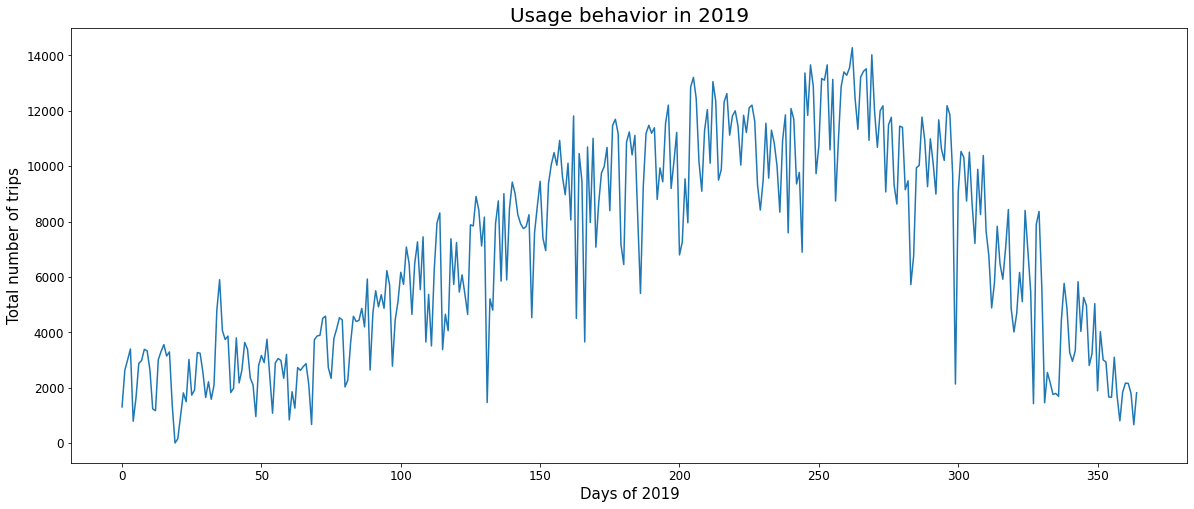

In [57]:
# Show overview of seasonal demand pattern 
fig_year = plt.figure(figsize=(20,8))
x_axis = range(365)
plt.plot(x_axis, bookings)
plt.xlabel('Days of 2019', fontsize=15)
plt.ylabel('Total number of trips', fontsize=15)
plt.title('Usage behavior in 2019', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.grid(False)
plt.show()

We can observe that there are more trips taken during the warmer months than during winter.

We will confirm this by having a look at the usage behavior for each temperature.

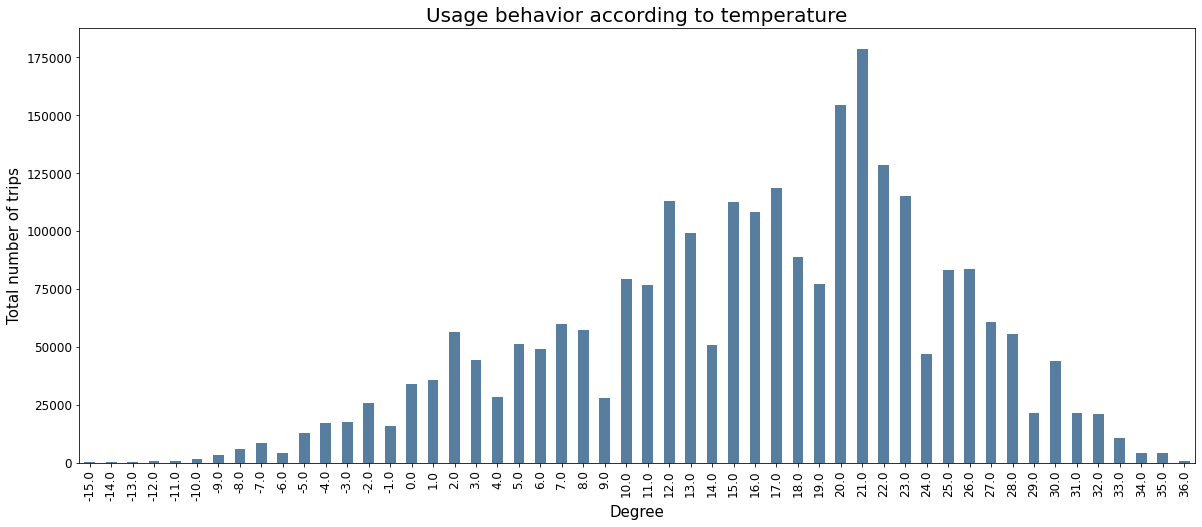

In [58]:
#At what Temparature have the most trips been taken
mean_temps = (trip_data_website['min_temp'] + trip_data_website['max_temp']) / 2
mean_temps = mean_temps.apply(np.floor)

mean_temps_data = mean_temps.groupby(mean_temps).count().plot.bar(figsize=(20,8), color=['#577d9f'])

plt.title('Usage behavior according to temperature', fontsize=20)
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Total number of trips', fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.grid(False)
plt.show()

We can confirm the assumption that there are more bookings at warmer temperatures, with a peak at 21 degrees, but then falling demand for the very hot temperatures.

Now we will plot the usage behavior grouped by the hours of a day with precipitation and without precipitation.

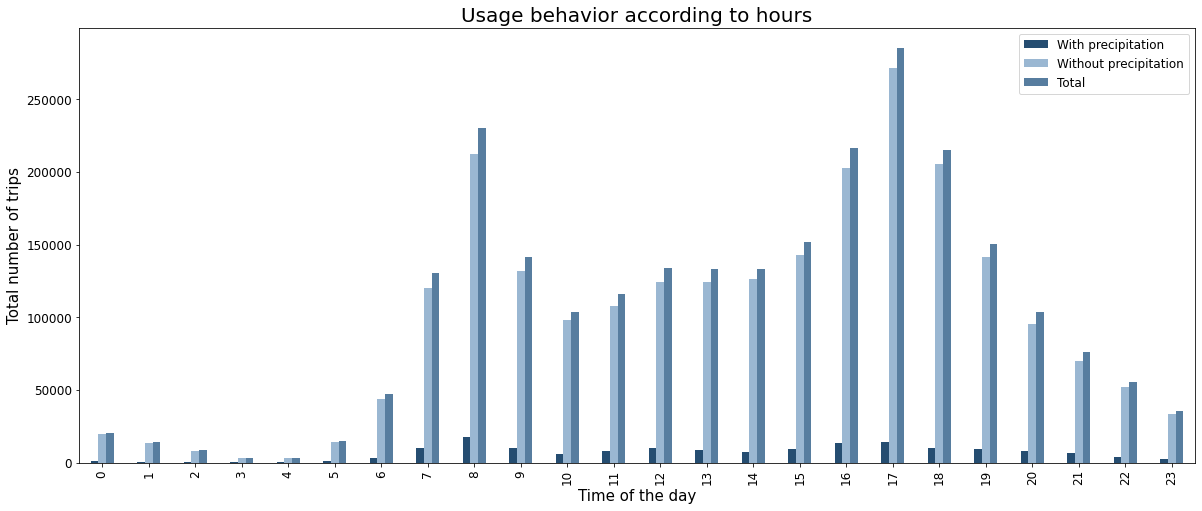

In [59]:
# Extract the start_time and precip columns from trip_data_website df
hours = pd.DataFrame(trip_data_website, columns = (['start_time', 'precip']))

# Convert start_time column to timedelta with the hour as the unit
hours['start_time'] = pd.to_timedelta(hours['start_time'].dt.hour, unit='H')

# Group the hours of the day and precip column and count the number of occurrences
flusage_day = hours.groupby(["start_time", "precip"]).size().reset_index(name='counts')

# Concatenate the data for with precip, without precip, and total
concatedGraphs = pd.concat(
    [flusage_day[flusage_day['precip'] == 1].reset_index()["counts"].rename("With precipitation"), 
     flusage_day[flusage_day['precip'] == 0].reset_index()["counts"].rename("Without precipitation"),
    flusage_day.groupby(["start_time"]).sum().reset_index()["counts"].rename("Total")],
    axis=1)

# Create the bar chart with the hour on the x-axis, the number of rentals on the y-axis, and set the figure size
concatedGraphs.plot.bar(figsize=(20,8), color=['#254d71', '#9ab7d2', '#577d9f'])
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Total number of trips', fontsize=15)
plt.title('Usage behavior according to hours', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

From the plot, it can be seen that the number of trips during the early hours of the day is relatively low. However, as the day progresses, the number of trips increases significantly, with peak usage observed at 8 am and 4 pm to 6 pm. This trend is likely due to people using the service to commute to or away from work.

Furthermore, the plot also shows that when it is raining, the number of trips per hour is significantly lower than when it is not raining. This confirms our assumption from the previous charts that the weather plays a significant role for the usage of the bike sharing service.

Next, we will have a look at the usage behavior according to the days of the week.

In [60]:
#Create a dictionary with all booked rides grouped by the weekday
trip_data_website['weekday'] = trip_data_website['start_time'].dt.dayofweek
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
trip_data_website["weekday"].replace(days, inplace=True)
week_dict = {value: len(trip_data_website.loc[trip_data_website.weekday == value, :]) for key, value in days.items()}

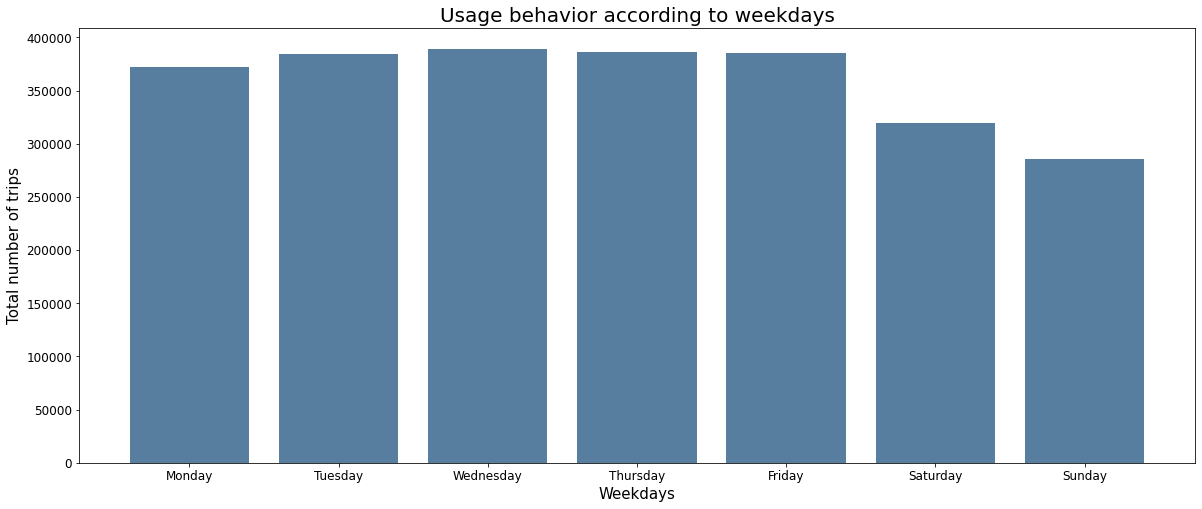

In [61]:
#Show overview of bookings during the week
fig_weekdays = plt.figure(figsize=(20,8))
plt.bar(range(len(week_dict)), list(week_dict.values()), align='center', color=['#577d9f'])
plt.xlabel('Weekdays', fontsize=15)
plt.ylabel('Total number of trips', fontsize=15)
plt.title('Usage behavior according to weekdays', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(range(len(week_dict)), list(week_dict.keys()))
plt.grid(False)
plt.show()

The plot illustrates the total number of trips taken on each weekday. We can observe that from Monday to Friday, the number of trips is higher than the number of trips on the weekend.

The high usage on weekdays is likely due to people using the service to get to and from work. This also serves as a possible explanation for the decrease in service during the weekend, as presumably fewer people commute to work.

## 2.2 Geographical Demand Patterns
In this section, we will examine the geographical demand patterns. We will start by analyzing total demand for each station, then move on to the top 10 stations. Lastly, we will show the 5 most and 5 least frequently used stations on Google Maps.

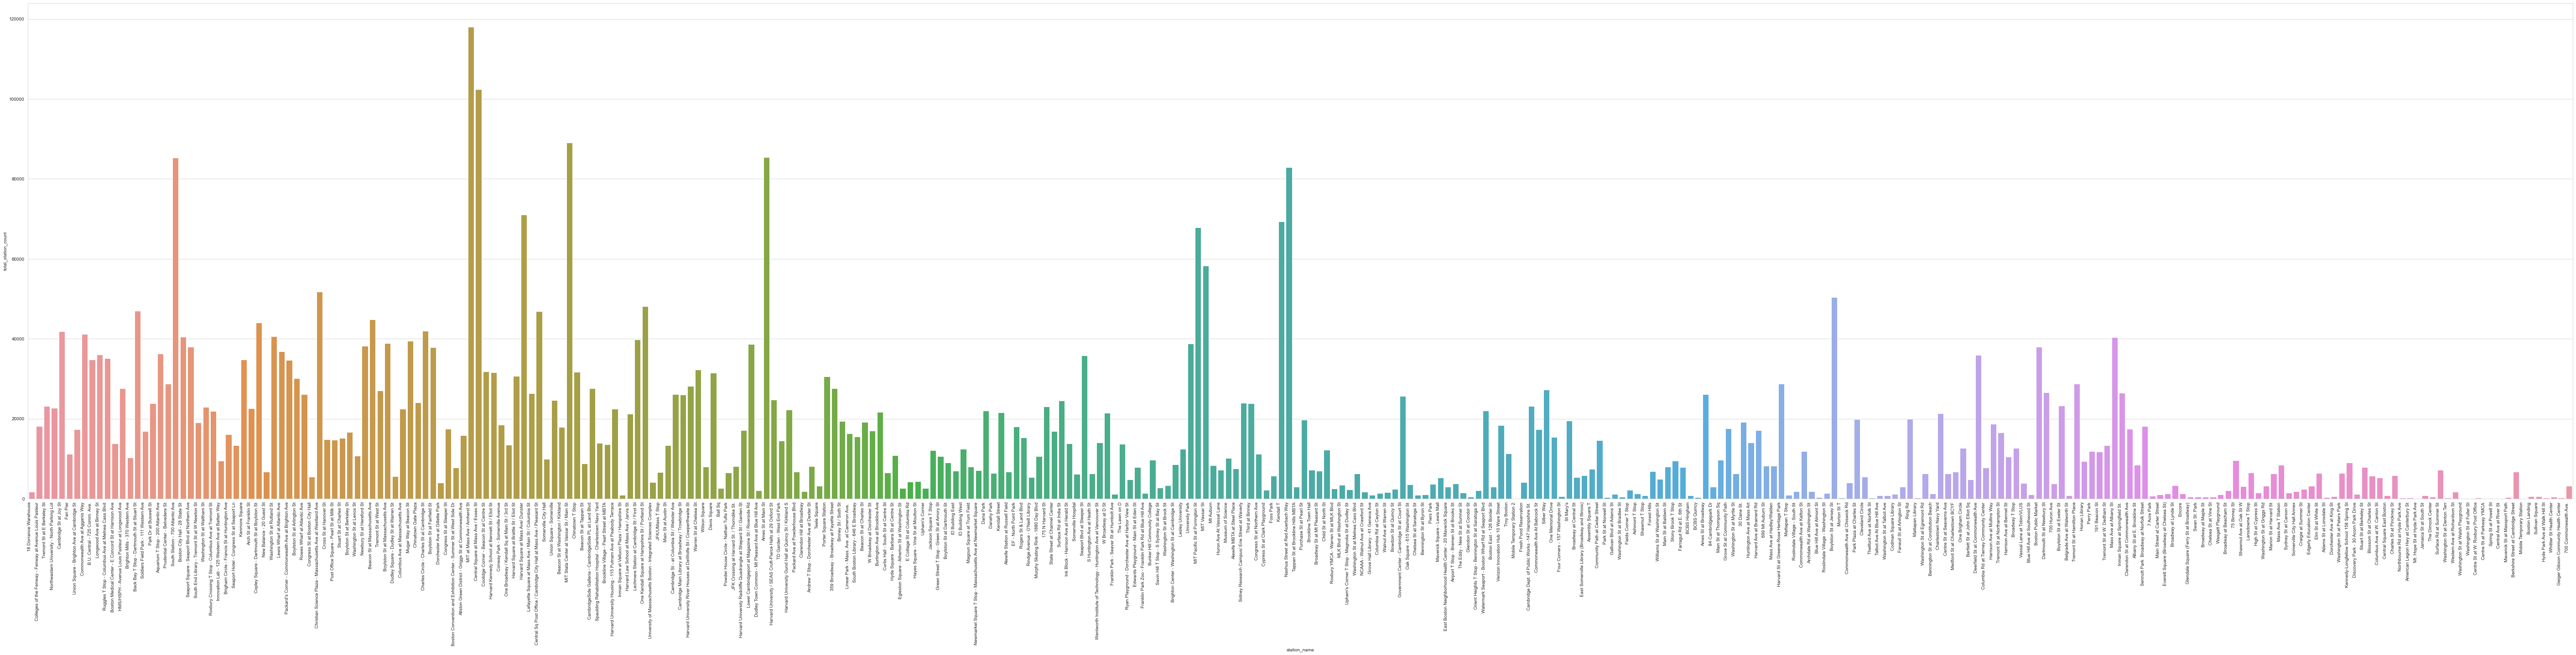

In [62]:
sns.set_style("whitegrid")

#Show overview of all stations and total bike counts
fig, ax = plt.subplots(figsize=(100, 20))
sns.barplot(data=total_station_data, x="station_name", y="total_station_count", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

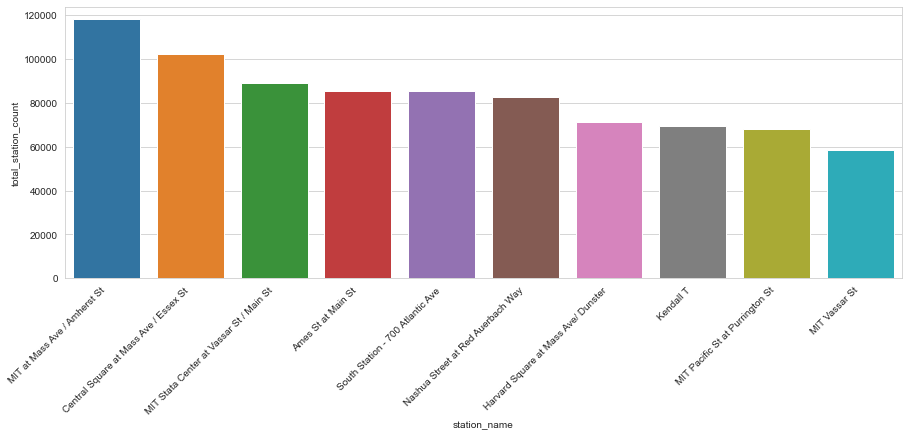

In [63]:
#Show top 10 stations
df_top10_total = pd.DataFrame(total_station_data.nlargest(n=10, columns=['total_station_count']))

# Visualize
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df_top10_total, x="station_name", y="total_station_count", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [64]:
# Divide the total station count by 2000 and assign the result to a new column, "map_count_radius"
# If the map_count_radius is less than 7, set it to 7
total_station_data["map_count_radius"] = total_station_data["total_station_count"] / 2000
total_station_data["map_count_radius"] = total_station_data.apply(lambda row: 7 if row["map_count_radius"] < 7 else row["map_count_radius"], axis=1)

# Adding colors, in which the stations will be represented on the map
# Find the stations with the lowest and highest total counts
lowest_total_count = list(total_station_data.nsmallest(6, "total_station_count").station_id_string)
highest_total_count = list(total_station_data.nlargest(5, "total_station_count").station_id_string)

# Create a function to assign a color to each station based on its total count
def set_map_color(row):
    if row["station_id_string"] in lowest_total_count:
        return "blue"
    elif row["station_id_string"] in highest_total_count:
        return "green"
    else:
        return "red"
    
# Apply the function to each row of the dataframe
total_station_data["map_count_color"] = total_station_data.apply(lambda row: set_map_color(row), axis=1)

# Create options for the map, including the latitude and longitude of Boston and the zoom level
gmap_options = GMapOptions(lat= 42.3580089, lng=-71.1004676, map_type='roadmap', zoom=12)

# Create a source for the data to be plotted on the map
map_source = ColumnDataSource(total_station_data)

# Bokeh size
output_notebook()
bokeh_width, bokeh_height = 800,600

# Show station details
hover_count = HoverTool(tooltips = [('Station', '@station_name'), ('Total Count', '@total_station_count')])

p_count = gmap(API_KEY, gmap_options, title='Boston Bike Station Distribution', width=bokeh_width, height=bokeh_height, 
               tools=[hover_count, 'reset', 'wheel_zoom', 'pan'])

p_count.circle('station_lng', 'station_lat', size='map_count_radius', alpha=0.4, color='map_count_color', source=map_source)

# Show
show(p_count)

Loading BokehJS ...

## 2.3 Key Performance Indicators (KPIs)
In this section we will deal with Key Performance Indicators (KPIs). The following KPIs where chosen for a dashboard for a fleet operator: 

- **KPI 1 - Current Fleet Utilization**: This KPI measures the percentage of the fleet that is currently in use, providing an immediate overview of the fleet's operations. It is a critical metric for fleet operators as it indicates the level of efficiency and productivity of the fleet. It also helps to identify any idle vehicles and optimize fleet size.
- **KPI 2.1 - Revenue Customers**: This KPI measures the amount of revenue generated solely from customers, providing an immediate overview of the fleet's financial performance. It is a key metric for fleet operators as it indicates the level of demand for their services and the effectiveness of their pricing strategy.
- **KPI 2.2 - User (Customer/Subscriber) Split**: This KPI measures the proportion of customers and subscribers among all clients, providing an immediate overview of the fleet's customer base. It is a key metric for fleet operators as it indicates the level of loyalty and retention among customers, and it helps to identify the most profitable customers.
- **KPI 3.1 - Coverage Map**: This KPI provides a visual representation of the fleet's geographical coverage, providing an immediate overview of the fleet's operations in different areas. It is a key metric for fleet operators as it indicates the level of accessibility and convenience of their services and helps to identify areas where more vehicles are needed.
- **KPI 3.2 - Station Coverage**: This KPI measures the coverage for a single station, providing an immediate overview of the fleet's operations for any interesting station. It is a key metric for fleet operators as it indicates the level of accessibility and convenience of their services and helps to identify the most profitable stations.

### Preparation
Before calculating the KPIs, we need to prepare some variables that will be used in this section. Since we intend to use these KPIs as a real-time dashboard, we have chosen to use the current date and time as the basis for the weather conditions and assume it to be in the year 2019. Using this approach, we can plot the last 24 hours of the "current" date and compare it.

In [65]:
# Create bar chart out of a plot
def autolabelFloat(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % '{:.2f}'.format(float(height)))

# Set the 'current' date and weather conditions
current_date = datetime.today().date()
current_time = datetime.today().time()

current_date_in_2019 = datetime(year=2019, month=current_date.month, day=current_date.day, hour=current_time.hour, minute=0)

# Currently 2 degrees and no rain
current_rain_status = 0
current_temperature = 2.0

### KPI 1 - Current Fleet Utilization

The first KPI presents the current utilization of the fleet on an hourly basis for the last 24 hours. It compares the usage of bikes for each hour in the last 24 hours to the average usage of bikes for the same hour in the last 7 days.

In [66]:
# Provide timeframe & rain as input
input_days = 7

# Get last 7 days & create new df
last_x_days = current_date_in_2019 - timedelta(days=input_days)
trips_last_x_days = trip_data_website.loc[(trip_data_website['start_time'] >= last_x_days) & (trip_data_website['start_time'] <= current_date_in_2019)].copy()

# Make new column with only the starting hour
trips_last_x_days['time'] = trips_last_x_days['start_time'].dt.hour

# Get hourly bike count for the last 7 days
bike_counts_hourly_x_days = trips_last_x_days.groupby('time')['bike_id'].size()

# Reset index
bike_counts_hourly_x_days = bike_counts_hourly_x_days.reset_index()

In [67]:
bike_counts_hourly_x_days['bike_counts_average'] = bike_counts_hourly_x_days['bike_id'] / input_days

In [68]:
# Create dataframe for the result
bike_count_hourly_24h = pd.DataFrame()

# Get last 24 hours
last_24_hours = current_date_in_2019 - timedelta(hours=23)

# Get number of vehicles used throughout 2019
bike_count = trip_data_website['bike_id'].groupby(trip_data_website['bike_id']).size().size

# Filter all trips by weather conditions provided as input
trips_weather_filtered = trip_data_website.loc[(trip_data_website['max_temp'] <= current_temperature+1) & (trip_data_website['max_temp'] >= current_temperature-1) & (trip_data_website['precip'] == current_rain_status)]

# Calculate the utilization for the last 24 hours
for x in range(24):
    start_calculation = last_24_hours - timedelta(hours=1)
    hourly_trips = trip_data_website.loc[(trip_data_website['start_time'] >= start_calculation) & (trip_data_website['start_time'] <= last_24_hours)] 
    hourly_trips_bike_count = hourly_trips['bike_id'].groupby(hourly_trips['bike_id']).size().size
    hour = last_24_hours.hour
    bike_count_hourly_24h = bike_count_hourly_24h.append({'time': hour, 'hourly_trips_bike_count': hourly_trips_bike_count}, ignore_index=True)
    last_24_hours = last_24_hours + timedelta(hours=1)

# Make time as integer
bike_count_hourly_24h['time'] = bike_count_hourly_24h['time'].astype(int)

In [69]:
# Merge average bike count last x days and bike count last 24 hours
result_kpi1_utilization = pd.merge(bike_count_hourly_24h, bike_counts_hourly_x_days, on='time')

In [70]:
# Calculate util
result_kpi1_utilization['util'] = result_kpi1_utilization['hourly_trips_bike_count'] / result_kpi1_utilization['bike_counts_average'] * 100

In [71]:
# Rename columns
result_kpi1_utilization = result_kpi1_utilization.rename(columns={'hourly_trips_bike_count':'bike_count_hourly_24h', 'bike_id': 'total_bike_count_last_x_days', 'bike_counts_average':'average_bike_count_x_days'})

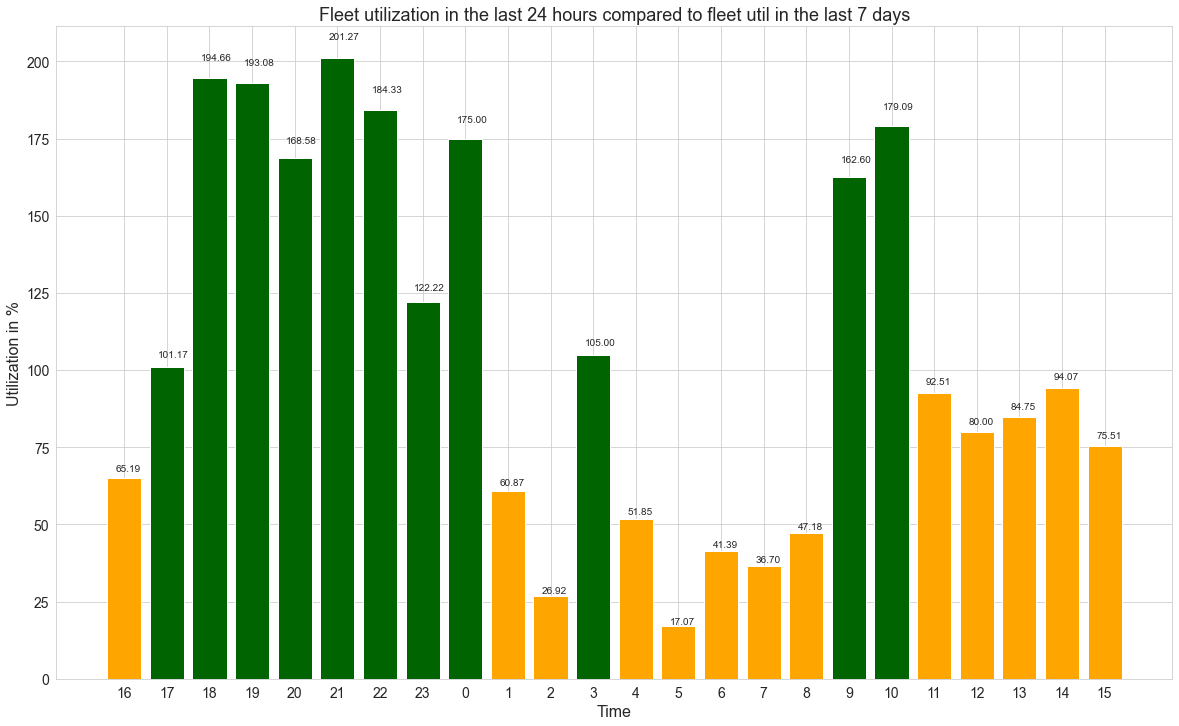

In [72]:
# Visualize utilization
fig = plt.figure(figsize=(20,12))
bins = result_kpi1_utilization['time'].astype('int32').values

plt.tick_params(axis='both', labelsize=14)
plt.title('Fleet utilization in the last 24 hours compared to fleet util in the last ' + str(input_days) + ' days', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Utilization in %', fontsize=16)
autolabelFloat(plt.bar(result_kpi1_utilization['time'].astype('int32').astype('str').values, result_kpi1_utilization['util'], color=np.where(result_kpi1_utilization['util']<95, 'orange', 'darkgreen'), tick_label=bins))
# plt.savefig('./figs/kpis/utilization.jpeg')
plt.show()

From the data (30.01.2023 16:17), we can see that the utilization rate fluctuates throughout the day, with the highest utilization rate being recorded at 9 pm (201.27), followed by 6 pm (194.66) and 7 pm (193.08). During these hours, almost twice the amount of bikes were used compared to the average usage in the last 7 days. On the other hand, the lowest utilization rate was recorded at 5 am (17.07). The low utilization rates indicate that there were less trips during these hours compared to the average usage in the last 7 days. If there were no trips during a certain hour in the last 24 hours, the utilization would be 0, which is not the case here.


### KPI 2.1 - Revenue Customers

This KPI calculates the absolute revenue from customers in the last 24 hours. The revenue is calculated by using the pricing information on Boston Bikes website, where they state that it costs 2.95 dollars initially plus additional 2.5 dollars for every 30 minutes used.

In [73]:
# Set the date and time for 2019
current_date = datetime.today().date()
current_time = datetime.today().time()

current_date_in_2019 = datetime(year=2019, month=current_date.month, day=current_date.day, hour=current_time.hour, minute=00)

# Filter trips made by customers (id = 0)
revenue_customers = trip_data_website.loc[(trip_data_website['user_type_id'] == 0)]

# Filter df for 2019 (also ending trips)
revenue_customers = revenue_customers[revenue_customers['stop_time']<pd.to_datetime('2020-01-01 00:00:00')]

# Set start time as index
revenue_customers = revenue_customers.set_index('start_time', drop=False)

# Filter for last 24 hours
revenue_customers_last_24h = revenue_customers.loc[current_date_in_2019-timedelta(hours=24):current_date_in_2019].copy()

# Calculate how often 30 min fits into trip duration
revenue_customers_last_24h['count_payments'] = revenue_customers_last_24h['trip_duration'].div(1800)

# Round values down 
revenue_customers_last_24h['count_payments'] = revenue_customers_last_24h['count_payments'].astype(int)

# Calculate total payment
revenue_customers_last_24h['total_payment'] = 2.95 + revenue_customers_last_24h['count_payments'] * 2.5

# Get last 24 hours
last_24_hours = current_date_in_2019 - timedelta(hours=23)

# Create empty dataframe for result
result_kpi2_revenue = pd.DataFrame()

# Loop for the last 24 hours
for x in range(24):
    # Slice df to only have 1 hour per iteration
    start_calculation = last_24_hours - timedelta(hours=1)
    
    result_revenue_customers_last_24h = revenue_customers_last_24h.loc[start_calculation:start_calculation+timedelta(hours=1)]

    # Loop over trips in each hour and add up total payments
    total_payment_customers = 0
    for key, value in result_revenue_customers_last_24h.iterrows():
        total_payment_customers = total_payment_customers + result_revenue_customers_last_24h.loc[key].total_payment
        
    # Get hour and append results into final df
    hour = start_calculation.hour
    result_kpi2_revenue = result_kpi2_revenue.append({'time': hour, 'revenue': total_payment_customers}, ignore_index=True)

    # Add one hour
    last_24_hours = last_24_hours + timedelta(hours=1)

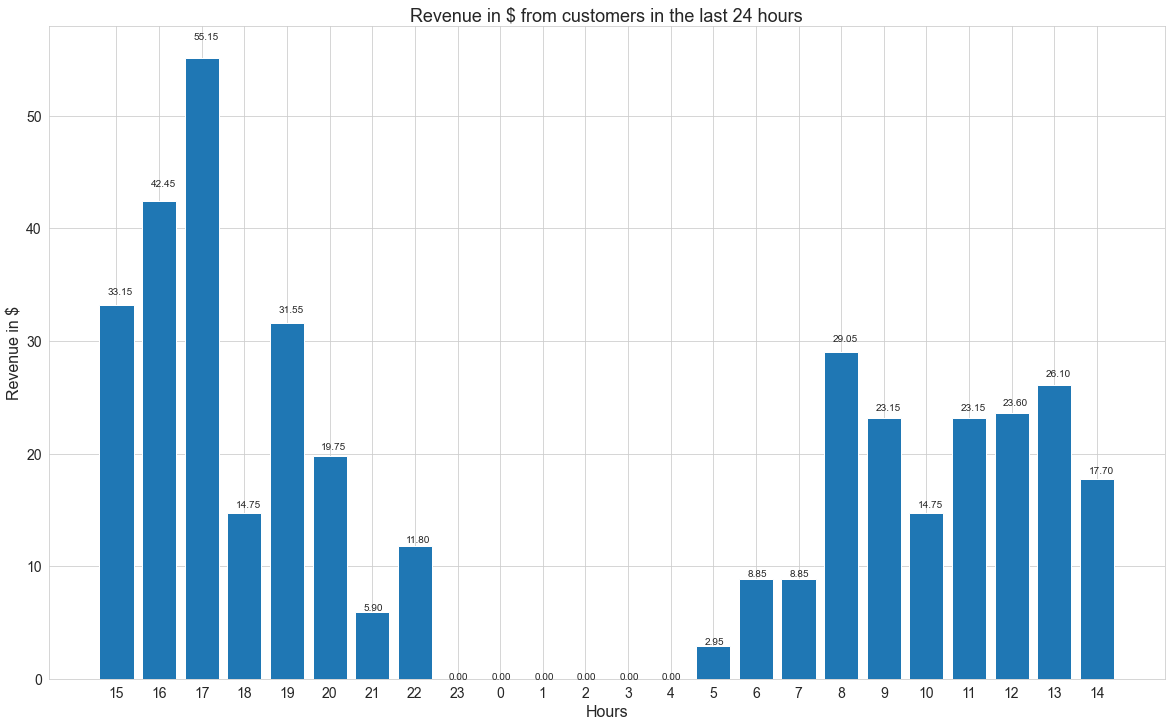

In [118]:
# Visualize the revenue by customers for the last 24 hours
fig = plt.figure(figsize=(20,12))
bins = result_kpi2_revenue['time'].astype('int32').values

plt.tick_params(axis='both', labelsize=14)
plt.title('Revenue in $ from customers in the last 24 hours', fontsize=18)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Revenue in $', fontsize=16)
autolabelFloat(plt.bar(result_kpi2_revenue['time'].astype('int32').astype('str').values, result_kpi2_revenue['revenue'], tick_label=bins))
# plt.savefig('./figs/kpis/revenue_customer_example.jpeg'
plt.show()

From the data (30.01.2023 16:20), we can see that the absolute revenue by customers in the last 24 hours fluctuates throughout the day, with the highest revenue being recorded at 5 pm (55.15 dollars), followed by 4 pm (42.45 dollars). If there were no trips during a certain hour in the last 24 hours, the revenue would be 0, which is the case from 11 pm to 4 am. Generally, the revenue from customers seems to be quite low, which can be explained by the next KPI.

### KPI 2.2 - User (Customer/Subscriber) Split
This KPI displays the absolute number of trips taken by both customers and subscribers over the course of the last 24 hours, separated by user group.

In [75]:
# Set the date and time for 2019
current_date = datetime.today().date()
current_time = datetime.today().time()

current_date_in_2019 = datetime(year=2019, month=current_date.month, day=current_date.day, hour=current_time.hour, minute=00)

# Set start time as index
trips_last_24h = trip_data_website.set_index('start_time', drop=False)

# Rename index
trips_last_24h.index.names = ['start_time_index']

# Get trips in the last 24 hours
trips_last_24h = trips_last_24h.loc[current_date_in_2019-timedelta(hours=24):current_date_in_2019].copy()

# Get trips last 24 hours for each subscriber and customers
trips_last_24h_subscriber = trips_last_24h.loc[trips_last_24h['user_type'] == 'Subscriber']
trips_last_24h_customer = trips_last_24h.loc[trips_last_24h['user_type'] == 'Customer']

In [76]:
# Get last 24 hours
last_24_hours = current_date_in_2019 - timedelta(hours=23)

# Create empty dataframe for result
result_kpi2_user_splits = pd.DataFrame()

# Loop for the last 24 hours
for x in range(24):
    # Slice df to only have 1 hour per iteration
    start_calculation = last_24_hours - timedelta(hours=1)
    trips_last_24h_subscriber_1h = trips_last_24h_subscriber.loc[start_calculation:start_calculation+timedelta(hours=1)]
    trips_last_24h_customer_1h = trips_last_24h_customer.loc[start_calculation:start_calculation+timedelta(hours=1)]

    count_trips_subscriber = len(trips_last_24h_subscriber_1h)
    count_trips_customer = len(trips_last_24h_customer_1h)
    count_total_trips = count_trips_subscriber + count_trips_customer
    
    # No division by 0
    if count_total_trips == 0:
        percentage_subscriber_trips = 0
        percentage_customer_trips = 0
        # Get hour and append results into final df
        hour = start_calculation.hour
        result_kpi2_user_splits = result_kpi2_user_splits.append({'time': hour, 'customer_trips_percent': percentage_customer_trips, 'subscriber_trips_percent': percentage_subscriber_trips, 'customer_trips_absolute': count_trips_customer, 'subscriber_trips_absolute': count_trips_subscriber }, ignore_index=True)

        last_24_hours = last_24_hours + timedelta(hours=1)
    
    else:
        percentage_subscriber_trips = (count_trips_subscriber / count_total_trips * 100)
        percentage_customer_trips = (count_trips_customer / count_total_trips * 100)

        # Get hour and append results into final df
        hour = start_calculation.hour
        result_kpi2_user_splits = result_kpi2_user_splits.append({'time': hour, 'customer_trips_percent': percentage_customer_trips, 'subscriber_trips_percent': percentage_subscriber_trips, 'customer_trips_absolute': count_trips_customer, 'subscriber_trips_absolute': count_trips_subscriber }, ignore_index=True)

        last_24_hours = last_24_hours + timedelta(hours=1)

result_kpi2_user_splits['customer_trips_absolute'] = result_kpi2_user_splits['customer_trips_absolute'].astype('int64')
result_kpi2_user_splits['subscriber_trips_absolute'] = result_kpi2_user_splits['subscriber_trips_absolute'].astype('int64')

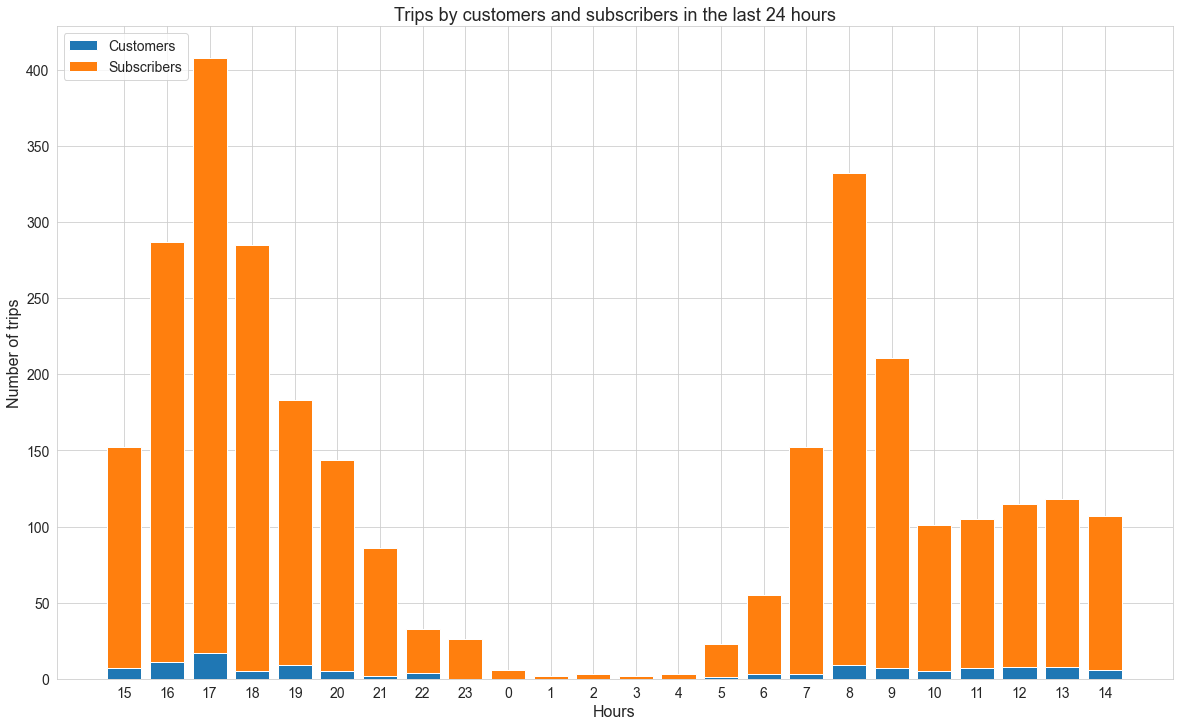

In [77]:
# Visualize the split of subscribers and customers for the last 24 hours
fig = plt.figure(figsize=(20,12))
bins = result_kpi2_user_splits['time'].astype('int64')

# Set font size for tick labels and title
plt.tick_params(axis='both', labelsize=14)
plt.title('Trips by customers and subscribers in the last 24 hours', fontsize=18)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Number of trips', fontsize=16)

# Create bar chart
plt.bar(bins.astype('str').values, result_kpi2_user_splits['customer_trips_absolute'], tick_label=bins.values, label='Customers')
plt.bar(bins.astype('str').values, result_kpi2_user_splits['subscriber_trips_absolute'], bottom = result_kpi2_user_splits['customer_trips_absolute'], tick_label=bins.values, label='Subscribers')

# Add legend
plt.legend(loc='upper left', fontsize=14)

# Save figure
# plt.savefig('./figs/kpis/revenue_customer_example.jpeg')

# Show plot
plt.show()

Overall, the majority of bike trips are taken by subscribers, with customers making up a small percentage of total trips. This shows that Boston Bikes likely has a strong subscriber base. However, it also suggests that there may be room for improvement in attracting and retaining customers.

### KPI 3.1 - Coverage Map
This KPI utilizes the Google Maps API to visually represent the top 10 stations with the greatest and least difference between the number of starting and ending trips. The difference in these counts can indicate potential imbalances in the distribution of bikes at these stations, such as a shortage or surplus of bikes. By identifying these stations, Boston Bikes can take action to redistribute bikes, for example, by manually moving bikes to stations with shortages, or removing bikes from stations with surpluses.

In [78]:
# Create GMapOptions
gmap_options = GMapOptions(lat=42.365673, lng=-71.064263, map_type='roadmap', zoom=12)

# Create new df for coverage
station_coverage = total_station_data

# Get difference between start station count and end station count
station_coverage['difference_count'] = station_coverage['end_station_count'] - station_coverage['start_station_count']

# Get top 10 stations where more bikes are arriving than driving away or vice versa
top_10_largest_difference = station_coverage.nlargest(10, 'difference_count')
top_10_smallest_difference = station_coverage.nsmallest(10, 'difference_count')

# Assign a color and radius for each station based on the difference_count
top_10_largest_difference['map_count_color'] = 'orange'
top_10_smallest_difference['map_count_color'] = 'purple'
top_10_largest_difference['map_count_radius'] = top_10_largest_difference['difference_count'] / 100
top_10_smallest_difference['map_count_radius'] = top_10_smallest_difference['difference_count'].abs() / 100

# Merge data
top_5_difference = top_10_largest_difference.append(top_10_smallest_difference)

# Create a ColumnDataSource for the Bokeh plot
map_source = ColumnDataSource(top_5_difference)

# Create a HoverTool to display station name and difference count on hover
hover_count = HoverTool(
    tooltips=[('Station', '@station_name'), ('Difference', '@difference_count')])

# Create a Bokeh map plot
p_count = gmap(API_KEY, gmap_options, title='Boston Bike Station Distribution',
               width=800, height=600,
               tools=[hover_count, 'reset', 'wheel_zoom', 'pan']
               )
p_count.circle('station_lng', 'station_lat', size='map_count_radius', alpha=0.7,
               color='map_count_color', source=map_source)
# Show
show(p_count)

In order to enhance the performance of this KPI, it would be nice to incorporate real-time data, such as the latest 24 hours of a specific date, rather than using data that covers an entire year. This approach would provide a more accurate and up-to-date picture of the number of starting and ending trips at each station, allowing Boston Bikes to quickly identify and respond to any potential shortages or surpluses in their bike fleet.

### KPI 3.2 - Station Coverage
The purpose of this KPI is to determine the usage of a specific station by hour throughout the year. It does this by comparing the number of trips that start at the station with the number of trips that end at the station for each hour. A positive difference indicates that more trips start at the station during that hour, whereas a negative difference indicates that more trips end at the station during that hour. The user can input a single station to analyze.

In [79]:
# Set the input station id
input_station_id = 3

# Get relevant data 
df = trip_data_website[['start_station_id', 'end_station_id', 'start_time', 'stop_time']]

# Get rows where the start station id matches the input station id, add hour column, and count trips with groupby()
start_trips = df[df['start_station_id'] == input_station_id]
start_trips = start_trips.assign(hour=start_trips['start_time'].dt.hour)
start_counts = start_trips.groupby('hour').size().reset_index(name='counts')

# Get rows where the end station id matches the input station id, add hour column, and count trips with groupby()
end_trips = df[df['end_station_id'] == input_station_id]
end_trips = end_trips.assign(hour=end_trips['stop_time'].dt.hour)
end_counts = end_trips.groupby('hour').size().reset_index(name='counts')

# Merge start_counts and end_counts df on hour
result = pd.merge(start_counts, end_counts, on='hour')

# Add difference between the count of starting trips and ending trips
result['difference'] = result['counts_x'] - result['counts_y']

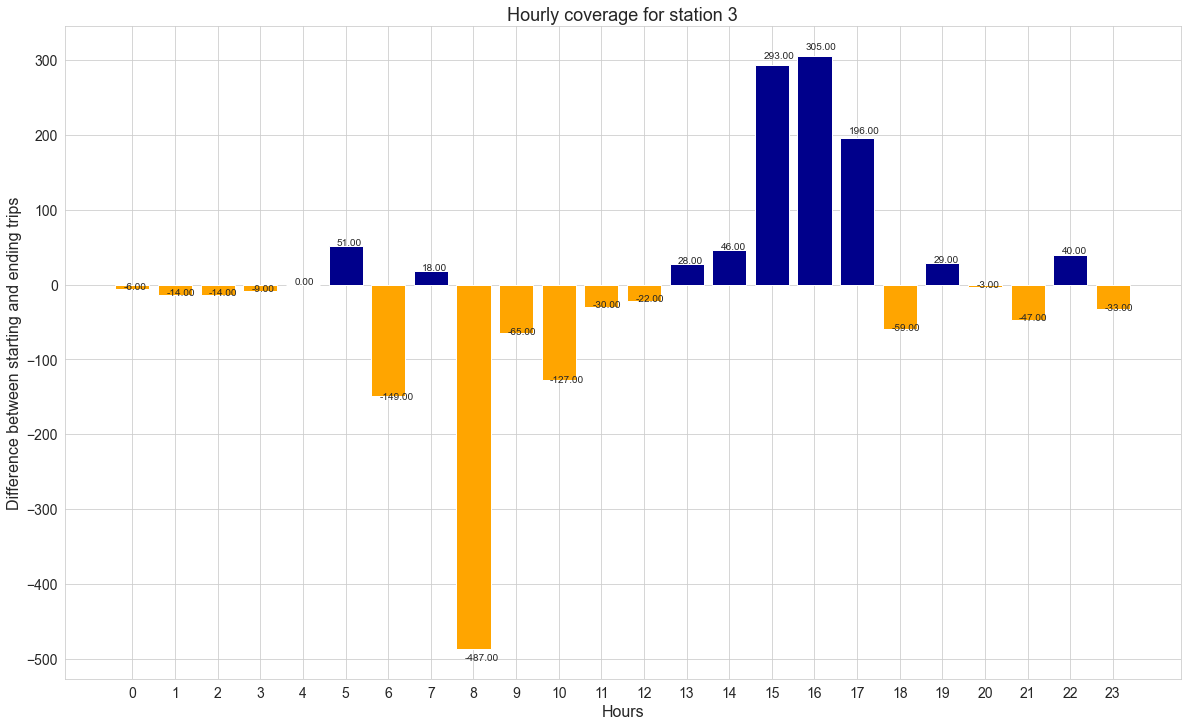

In [80]:
# Visualize the hourly coverage of a single station
fig = plt.figure(figsize=(20,12))

count_values = result.count().hour
bins = []
for i in range(count_values):
    bins.append(i)


# Use function to plot values
autolabelFloat(plt.bar(result['hour'].astype('int32').astype('str').values, result['difference'], color=np.where(result['difference']>0, 'darkblue', 'orange'), tick_label=bins))

# Set tick_params, xlabel, ylabel, and title
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Difference between starting and ending trips', fontsize=16)
plt.xlabel('Hours', fontsize=16)
plt.title('Hourly coverage for station ' + str(input_station_id), fontsize=18)
#plt.savefig('./figs/kpis/coverageGraph1.jpeg')
plt.show()

A negative value, indicated by yellow color, in the graph shows that there are more trips ending at the station than starting from it. This implies that there is a shortage of bikes at that station. On the other hand, a positive value, indicated by blue color, shows that more trips are starting from the station than ending at it. This indicates an excess of bikes at the station. This information can assist Boston Bikes in making operational decisions such as redistributing bikes to balance the supply and demand across different stations.

# 3. Clustering
In this chapter, we will perform a cluster analysis to identify the different patterns in bike rental demand. We will start by doing a user and trip type clustering in section 3.1 and then move on to location clustering in section 3.2. In both sections, we will use two algorithms, K-means++ and Principal Component Analysis (PCA), to group the data into clusters.

K-means++ is an unsupervised machine learning algorithm that is used for clustering, i.e. grouping similar data points together. The algorithm works by iteratively finding the centroid of each cluster and reassigning the data points to the closest centroid until convergence is achieved.

Principal Component Analysis (PCA) is a dimensionality reduction technique that is used to project high-dimensional data into a lower-dimensional space while retaining as much of the original information as possible. In our case, we will use PCA to check if we can further reduce the number of features.

By clustering the data based on demand patterns, we will be able to identify the different trip types and customer types, as well as group locations based on their demand patterns. The goal is to label these clusters in a meaningful way to help us better understand the bike rental demand patterns.

## 3.1 User and trip types

In this task, we aim to identify clusters of trip types and/or customer types based on the bike rental demand patterns. To achieve this, we first start with some simple clustering using the full dataset. Then, we prepare for k-means clustering and  perform k-means++. Finally, we check if a Principal Component Analysis is suitable to get further insights.

### Simple clustering with full dataset
First we will perform some preprocessing steps for a simple cluster analysis of the trip data. We will use ***trip_duration, age, max_temp, gender, precip*** and ***user_type_id*** as our selected features. We will use ***user_type_id*** to see if we can simply differentiate between subscribers and customers.

In [191]:
# Calculating and setting the age of customers by subtracting their birth year from 2019
trip_data_website['age'] = 2019 - trip_data_website['birth_year']

In [82]:
# Create new df with selected features
customer_cluster_analysis = pd.DataFrame(trip_data_website, columns = (['trip_duration', 'age', 'max_temp']))

# Standardizing the data
scaler = StandardScaler()
customer_cluster_analysis_scaled = scaler.fit_transform(customer_cluster_analysis)

# Create a new df with the standardized data, preserving the column and index information from the original df
customer_cluster_analysis_scaled_df = pd.DataFrame(customer_cluster_analysis_scaled,
                                                   columns=customer_cluster_analysis.columns,
                                                   index=customer_cluster_analysis.index)

# Adding additional columns
customer_cluster_analysis_scaled_df['gender'] = trip_data_website['gender']
customer_cluster_analysis_scaled_df['precip'] = trip_data_website['precip']
customer_cluster_analysis_scaled_df['user_type_id'] = trip_data_website['user_type_id']

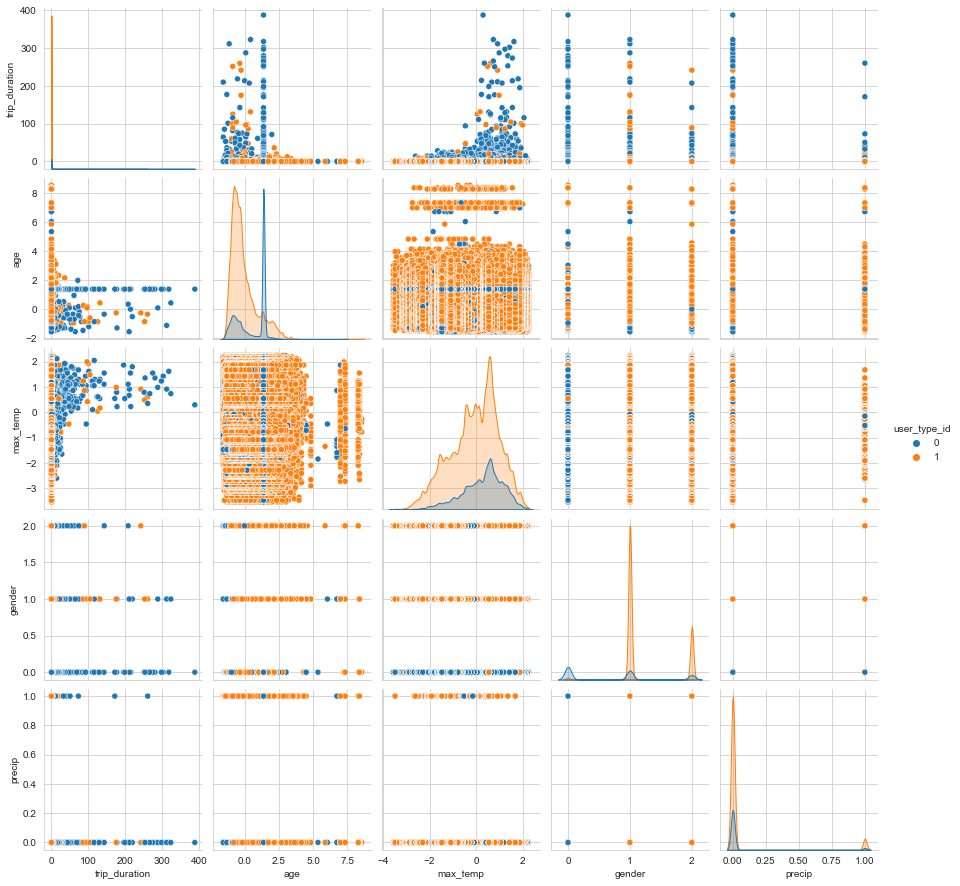

In [92]:
# Create pairplot with user_type_id used to color the points
sns.pairplot(data=customer_cluster_analysis_scaled_df, hue='user_type_id')

We can see that simply the ***user_type_id*** is not enough to find clusters and subscribers and customers are not easily differentiated.

### K-Means preparation

We use the k-means clustering algorithm to find the optimal number of clusters for the user and customer types. The elbow method is used to determine the right number of clusters. The elbow method is a common technique used to determine the optimal number of clusters in a k-means clustering algorithm. The method involves fitting the k-means model to the data for various values of k, and then plotting the sum of squared distances of samples to their closest cluster center (inertia) against the number of clusters. The optimal number of clusters is usually considered to be the value of k at which the loss (inertia) starts to decrease at a slower rate, appearing as an "elbow" on the plot.

In [ ]:
# Initializing values for the maximum number of clusters to test (k_max) and lists to store the clusters and losses
k_max = 15
clusters = []
losses = []

# Looping through a range of k values from 1 to k_max
for k in range(k_max):
    # Initializing a KMeans model with n_clusters=k+1
    model = KMeans(n_clusters=k+1)
    
    # Fitting the model to the customer_cluster_analysis_scaled data
    model.fit(customer_cluster_analysis_scaled)
    
    # Appending the number of clusters to the clusters list
    clusters.append(k+1)
    
    # Appending the value of the inertia_ attribute (sum of squared distances of samples to their closest cluster center) to the losses list
    losses.append(model.inertia_)

In [ ]:
# Visualize
plt.plot(clusters, losses)
plt.ylabel("Loss", fontsize=16)
plt.xlabel("Number of clusters", fontsize=16)
#plt.show()

In [ ]:
# Zoom in on plot
plt.plot(clusters, losses)
plt.ylabel("Loss", fontsize=16)
plt.xlabel("Number of clusters", fontsize=16)
plt.xlim([3,10])

### K-Means++ with k=5

We use the k-means algorithm to cluster the trip and user data. The k-means++ initialization method is used to ensure that the initial placement of the cluster centroids is optimal, leading to faster convergence and more accurate results. The number of clusters determined through the elbow method is 5.

In [ ]:
# Initializing a KMeans model with 5 clusters, using the k-means++ initialization method, a maximum of 300 iterations, 
# and 10 initializations with a random seed of 0
customer_cluster_analysis_kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300, n_init=10, random_state=0)

# Fitting the KMeans model to the scaled trip data
customer_cluster_analysis_kmeans.fit(customer_cluster_analysis_scaled)

# Using the KMeans model to predict the cluster labels for the trip data
customer_cluster_analysis_kmeans.predict(customer_cluster_analysis_scaled)

In [ ]:
# Creating a list of string values to represent the clusters
numbers = ["zero", "one", "two", "three", "four", "five"]

# Assigning the cluster labels predicted by the KMeans model
customer_cluster_analysis_scaled_df["five"] = customer_cluster_analysis_kmeans.predict(customer_cluster_analysis_scaled)

# Using the apply method to replace the numeric cluster labels with the string values
customer_cluster_analysis_scaled_df["five"] = customer_cluster_analysis_scaled_df["five"].apply(lambda x: numbers[x])

In [ ]:
# Using seaborn to create a pairplot, with the"five" column used to color the points in the plot
sns.pairplot(data=customer_cluster_analysis_scaled_df, hue="five")

- Type zero: **short convenience trips** - young users (all genders) who take short trips during moderate to high temperatures
- Type one: **short mandatory trips** - young users (all genders) who take very short trips during low temperature both when it is raining and not raining
- Type two: **long fair-weather trips** - young to middle-aged customers (mostly unknown or male) who take long trips during good weather
- Type three: **short work trips** - middle-aged to old users (all genders) who take short trips independent from weather
- Type four: **casual trips** - short to medium-distance trips by young to middle-aged users (all genders) during high temperatures typically when it is not raining

### Principal Component Analysis (PCA)

We will have a quick look at PCA, to see if we could potentially further reduce our features.

In [209]:
# Create df for pca
pca_customer_clustering_df = pd.DataFrame(trip_data_website, columns = (['trip_duration', 'age', 'max_temp', 'gender', 'precip', 'user_type_id']))

# Standardize data
scaler = StandardScaler()
pca_customer_clustering_scaled= scaler.fit_transform(pca_customer_clustering_df)

# Perform PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(pca_customer_clustering_scaled)
print(sum(pca.explained_variance_ratio_))

0.9029984709401132


The result is the explained variance ratio of the first 5 principal components calculated by PCA. The sum of the explained variance ratio tells us the proportion of the total variance in the data that is explained by the first 5 principal components. In this case, the sum of the explained variance ratio is 0.90, meaning that 90% of the total variance in the data is explained by the first 5 principal components.

In [210]:
# Display the explained variance ratio for each principal component
print("Explained Variance Ratio for each Principal Component:", pca.explained_variance_ratio_)

# Display the components of each principal component
print("Components of each Principal Component: \n", pca.components_)

Explained Variance Ratio for each Principal Component: [0.27728184 0.18511272 0.16654596 0.152333   0.12172495]
Components of each Principal Component: 
 [[ 0.03924487  0.50990741  0.16242397 -0.60582781 -0.07679556 -0.58236401]
 [ 0.02883174 -0.24465726  0.69832061  0.15082165 -0.64886014 -0.08884378]
 [ 0.99687831 -0.0370156   0.00207112  0.02343157  0.06561075  0.00231835]
 [ 0.05984515  0.25195164 -0.58305044 -0.01807042 -0.74861879  0.17953963]
 [ 0.01442643  0.75006838  0.3558885   0.24107067  0.08917451  0.49443455]]


The values in the explained variance ratio show that the first principal component alone explains approximately 27.7% of the total variance, the second principal component explains 18.5% and so on. Based on this result, the first five principal components can explain a good portion of the total variance in the original data. This information can be used to reduce the dimensionality of the data while still preserving most of the information.
 
In this case, we have utilized the k-means algorithm using the full set of six features in our data as inputs. As a result, there is no need to reduce the number of features as we have already processed the information with the complete dataset.

## 3.2 Location types
In this subchapter, we will have a look at the different location types to gain an understanding of the bike rental demand patterns. We will first prepare k-means, then perform k-means++ with the appropriate number of clusters, and lastly have a look at PCA.

### K-Means preparation
In this analysis, we have selected ***total_station_count, ratio***, and ***mean_temp*** as the key features for our analysis. ***mean_temp*** is calculated as the average of *max_temp* and *min_temp*. ***ratio*** is *start_station_count* divided by the *end_station_count*.

In [127]:
# Group mean temperatures to station names 
modified_trip_data_website = pd.DataFrame(trip_data_website.groupby('start_station_name')[['max_temp', 'min_temp']].mean())
modified_trip_data_website['mean_temp'] = (modified_trip_data_website['max_temp'] + modified_trip_data_website['min_temp']) / 2
modified_trip_data_website2 = modified_trip_data_website.drop(['max_temp', 'min_temp'], axis=1)

# Set correct index and rename column
modified_trip_data_website2['station_name'] = modified_trip_data_website2.index
modified_trip_data_website2.reset_index(drop=True, inplace=True)

# Merge to 'total_station_data'
total_station_weather_data = pd.merge(total_station_data, modified_trip_data_website2, on='station_name')

In [128]:
scaler = StandardScaler()

location_cluster_analysis = pd.DataFrame(total_station_weather_data, columns = (['start_station_count', 'end_station_count', 'total_station_count', 'mean_temp']))

X0 = location_cluster_analysis
X0['ratio'] = X0['start_station_count'] / X0['end_station_count']

# Select new characteristics for analysis
X1 = X0[['total_station_count', 'ratio', 'mean_temp']]
scaler.fit(X1)
location_cluster_analysis_scaled = scaler.transform(X1)

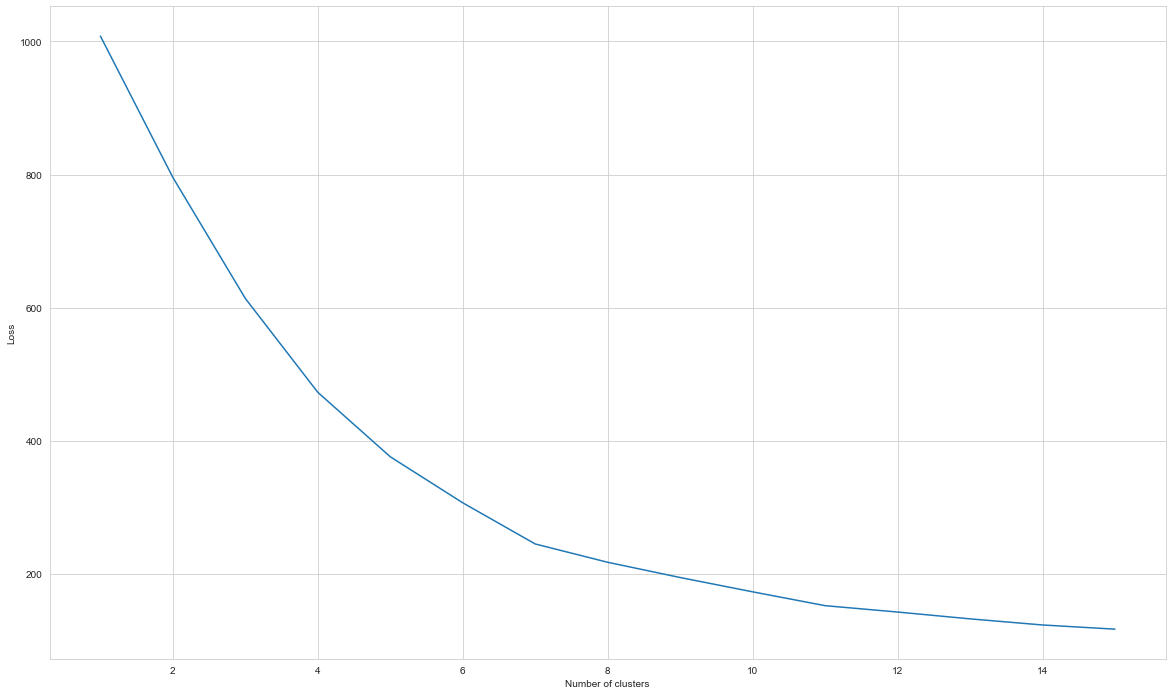

In [137]:
# Locations Clustering - kmeans' best K finding
k_max = 15
clusters2 = []
losses2 = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(location_cluster_analysis_scaled)
    clusters2.append(k+1)
    losses2.append(model.inertia_)

    
plt.figure(figsize=(20,12))
plt.plot(clusters2, losses2)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")

plt.show()

(2.0, 8.0)

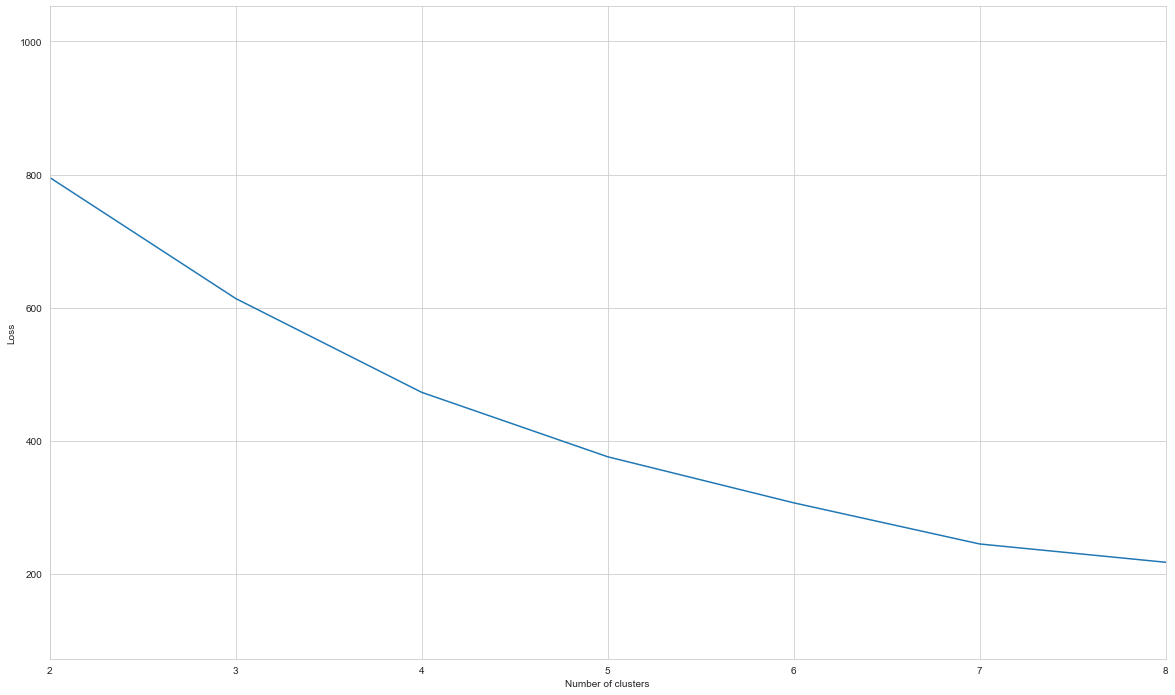

In [138]:
# Zoom in
plt.figure(figsize=(20,12))
plt.plot(clusters2, losses2)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([2,8])

From the plot, it appears that 4 would be a reasonable choice for the number of clusters.

### K-Means ++ with k=4

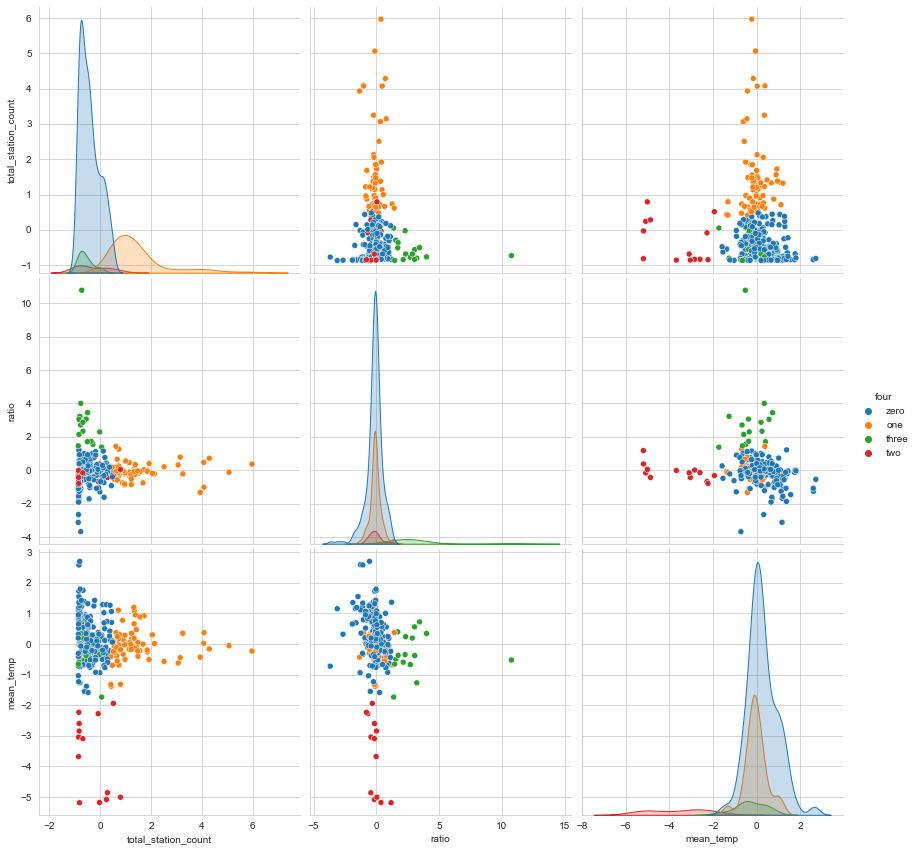

In [144]:
# We select 4 cluster groups here
numbers = ["zero", "one", "two", "three","four"]
four_means = KMeans(n_clusters=4)
four_means.fit(location_cluster_analysis_scaled)
station_scaled_full = pd.DataFrame(location_cluster_analysis_scaled, columns=X1.columns, index=X1.index)
station_scaled_full["four"] = four_means.predict(location_cluster_analysis_scaled)
station_scaled_full["four"] = station_scaled_full["four"].apply(lambda x: numbers[x])
pairplot = sns.pairplot(data=station_scaled_full, hue="four", size=4)

- Type zero: **popular summer hubs** - low ratio, middle to very high total station count, quite high average temperature
- Type one: **inactive stations in mild weather** - very low to low ratio, low total station count, middle to high average temperature
- Type two: **low activity cold stations** - even ratio, very low to low total station count, very low to low average temperatures 
- Type three: **low traffic starting hub** - positive ratio (more starting than ending trips), low total station count, mild average temperature

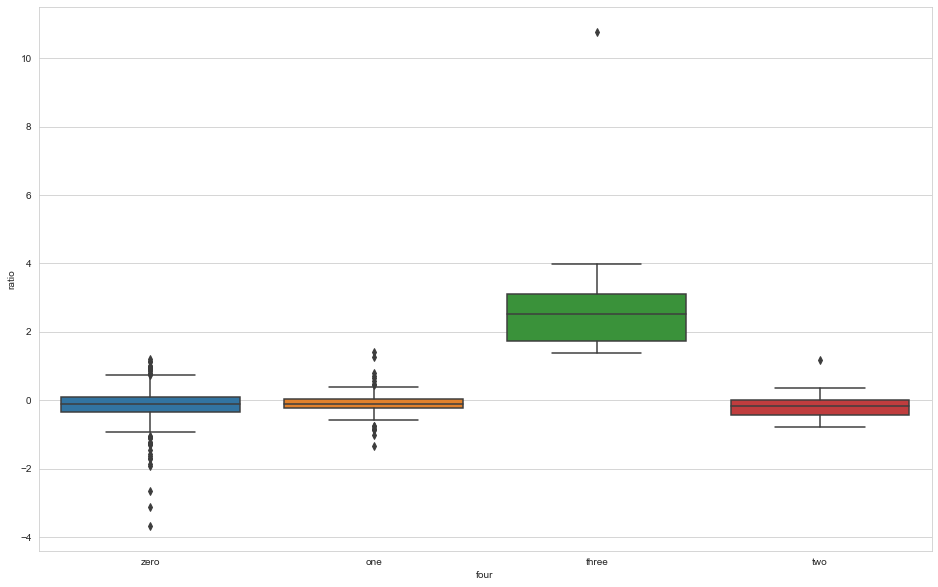

In [161]:
# Exploring Characteristics
plt.figure(figsize=(16,10))
boxplot = sns.boxplot(x="four", y="ratio", data=station_scaled_full)

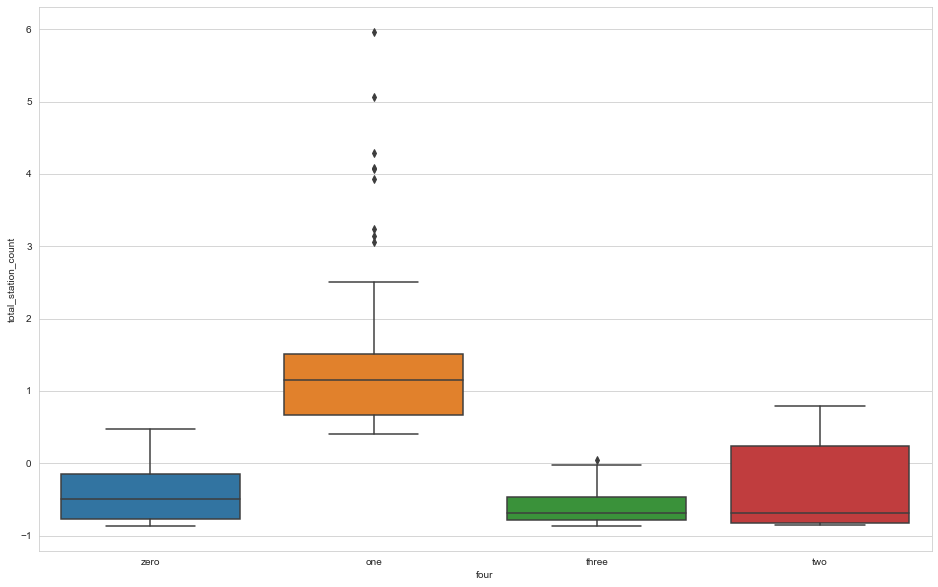

In [163]:
# Exploring Characteristics
plt.figure(figsize=(16,10))
boxplot = sns.boxplot(x="four", y="total_station_count", data=station_scaled_full)

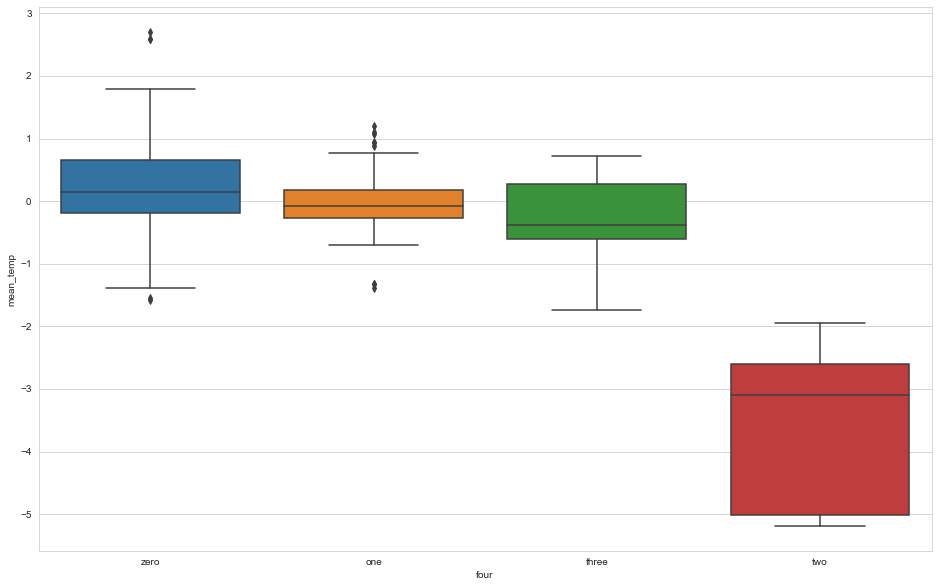

In [164]:
# Exploring Characteristics
plt.figure(figsize=(16,10))
boxplot = sns.boxplot(x="four", y="mean_temp", data=station_scaled_full)

### Principal Component Analysis (PCA)

In [168]:
pca_location = PCA(n_components=2)
X_pca_location = pca_location.fit_transform(location_cluster_analysis_scaled)
print(pca_location.explained_variance_ratio_)
print(sum(pca_location.explained_variance_ratio_))

[0.38574713 0.34379996]
0.7295470868951321


With an explained variance ratio of about 73% it would not make sense to reduce the features further.

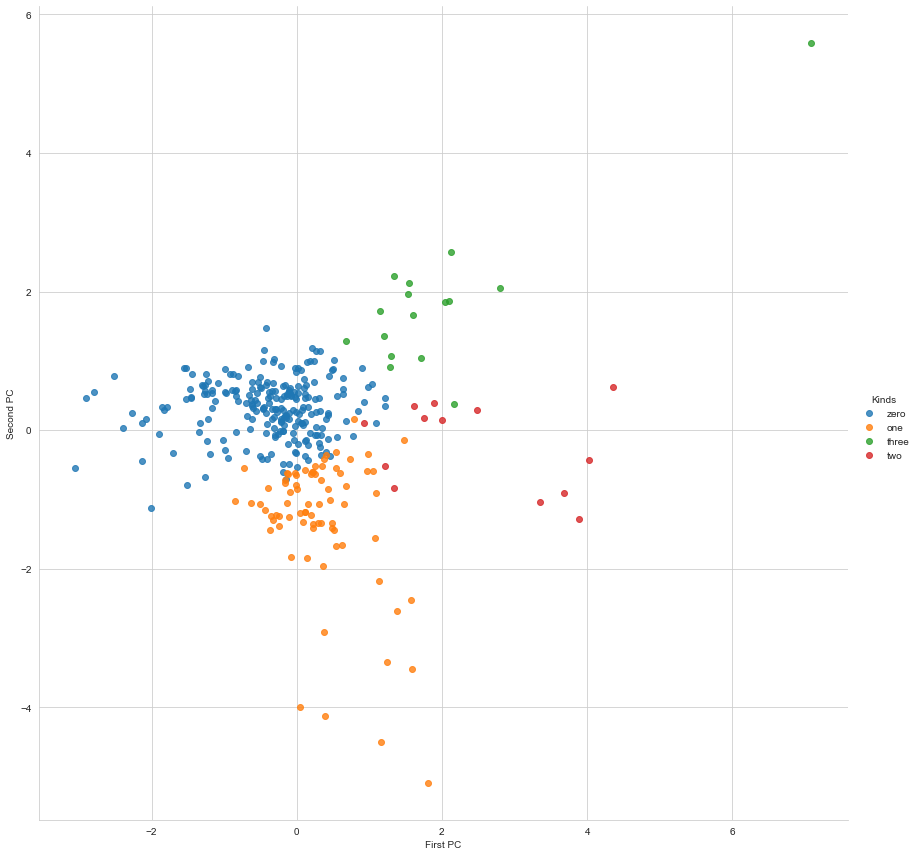

In [175]:
pca_locations_df = pd.DataFrame(X_pca_location, columns=["First PC", "Second PC"], index=X0.index)
pca_locations_df["Kinds"] = station_scaled_full["four"]
lmplot = sns.lmplot(x="First PC", y="Second PC", data=pca_locations_df, fit_reg=False, hue="Kinds", size=12)

# 4. Predictive Analytics

##  4.1 Preparation

### Feature Engineering

The features that we have chosen in this context are *time of the day*, *day of the week*, *month of the year*, and *precipitation*. These features were chosen based on our observations from the descriptive analytics in part 2.

Time of the day was chosen as a feature because it was observed that the demand for bikes is highest during specific times of the day, specifically 8am, 4pm, 5pm, and 6pm. Additionally, there is generally more demand for bikes during the day than during the night. This feature can be used to model the temporal patterns in the bike rental demand data, such as daily patterns, which can help to improve the accuracy of the predictions.

Day of the week was chosen as a feature because it was observed that the demand for bikes is higher during weekdays than during weekends. This feature can be used to model the temporal patterns in the bike rental demand data, such as weekly patterns, which can help to improve the accuracy of the predictions.

Month of the year was chosen as a feature because it was observed that there is more demand for bikes in warmer months (April-October) than in colder months (October-March). This feature can be used to model the temporal patterns in the bike rental demand data, such as seasonal patterns, which can help to improve the accuracy of the predictions.

Precipitation was chosen as a feature because it was observed that the demand for bikes is lower in the presence of precipitation than without. This feature can be used to model the relationship between the weather and the bike rental demand, which can help to improve the accuracy of the predictions.



### Which model to use?

#### Polynomial Regression
Polynomial regression is a form of 
linear regression that can be used to model non-linear relationships between independent variables and the dependent variable. It is suitable for predictive analytics as it can model the non-linear relationship between bike rental demand and independent variables such as weather data and time. For example, it can capture non-linear effects of weather data on demand like a temperature threshold above which the demand increases rapidly, and temporal dependencies such as demand being dependent on time of the day, day of the week, month or year.

Potential drawbacks of using polynomial regression for this scenario include the risk of overfitting, as the model may fit the noise in the data and make poor predictions on new data. Moreover, as the degree of the polynomial increases, the model becomes more complex, making it harder to interpret the results and the model may not generalize well to new data, leading to poor predictions.


#### ARIMA
ARIMA is a suitable model for the task of predictive analytics because it is specifically designed for time series data. The task involves forecasting total system-level demand in the next hour, which is a time-dependent variable. ARIMA models the temporal dependencies in time series data by taking into account the past values and errors of the variable being forecasted. This makes it well-suited for modeling the temporal patterns in the bike rental demand data, which has patterns such as seasonality, trends, and daily patterns. Additionally, ARIMA allows for the incorporation of exogenous variables such as weather data, which can be used as features in the model and can help to improve the accuracy of the predictions.

Drawbacks of using ARIMA for this scenario could include that it requires stationary data, which means that the mean, variance, and autocorrelation structure of the data should not change over time. The process of choosing the appropriate order of the model can also be challenging, which may require trial and error, and multiple iterations of model fitting and selection. Additionally, it may not be suitable in scenarios with high noise, irregular patterns or multiple seasonality in the data.

#### LSTM
Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is suitable for modeling time series data. LSTM is particularly well-suited for modeling time series data because it can remember past information that is relevant to the current prediction, even when the data has long-term dependencies. This allows it to effectively capture patterns in the data that span multiple time steps. Furthermore, LSTM can also handle missing data, irregular patterns and multiple seasonality, which are common in time series data.

Potential drawbacks of using LSTM for this scenario include its training complexity, as LSTM networks require more computational resources to train and can be time-consuming. Additionally, LSTM's large number of parameters may lead to overfitting if the model is not regularized properly.


### How to measure the model

To try and compare the model, we will let each model compare the last 500 hours of the year and calculate the Root Mean Squared Error, R-squared, and Mean Absolute Error for each model. 

- **Root Mean Squared Error** (RMSE): This measures the average magnitude of the error between the predicted and actual values. It  can be used to compare the accuracy of different models.
- **R-squared** (R2): This measures the proportion of the variance in the dependent variable that is explained by the independent variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
- **Mean Absolute Error** (MAE): This measures the average absolute difference between the predicted and actual values. It is a measure of the model's accuracy.

In [81]:
# Function printing out RMSE, R-squared and MAE
def eval_result(predicted_values, actual_values):
    terms = ["Very Short", "Short", "Mid", "Long"]
    metrics = {"Root Mean Squared Error": mean_squared_error, 
               "R2": r2_score,
               "Mean Absolute Error": mean_absolute_error}
    
    for i, term in enumerate(terms):
        start_index = i * 25
        end_index = start_index + 25
        for metric_name, metric_func in metrics.items():
            metric_value = metric_func(predicted_values[start_index:end_index], actual_values[start_index:end_index])
            print(f"{metric_name} {term} term: {metric_value}")
        print()

### Root Benchmark
We will take the data shifted by an hour as the root benchmark as it represents a simple and straightforward way to predict future values based on historical data. The idea is that the value for the next time step (hour) is likely to be similar to the value from the previous time step. This method is also known as the naive forecast method.

In [123]:
# Calculate RMSE between two time series
def root_benchmark():
    return mean_squared_error(ARIMA_data[1:-1], ARIMA_data.shift()[1:-1], squared=False)
root_benchmark()

174.90695519445944

A lower value of the RMSE indicates that the forecasted values are closer to the actual values and therefore the model is more accurate. So in this case, a value of roundabout 175 suggests that the naive forecast method is not that accurate, it has a high error. Still, we use it as the root benchmark.

## 4.2 Implementation of the models
### Polynomial Regression
The following code will construct and fit a polynomial model using the hour, day, and month as independent variables. It is important to randomize these variables to ensure that the model is not overfitting to a specific order of the data. To create the polynomial features, the PolynomialFeatures function is used with a degree of 5, as it was found to give the best results. The model's performance is evaluated using 10-fold cross validation and the Root Mean Squared Error (RMSE) metric. The final model is plotted to visualize its performance.

#### Prepare polynomial dataset

#### Implement polynomial model

In [101]:
def create_test_scenarios(poly_degree):
    # Set StandardScaler
    scaler = StandardScaler()

    # Polynomial transformation of columns
    months = PolynomialFeatures(degree=poly_degree).fit_transform(scaler.fit_transform(poly_data["month"].to_frame().to_numpy()))
    weekdays = PolynomialFeatures(degree=poly_degree).fit_transform(scaler.fit_transform(poly_data["weekday"].to_frame().to_numpy()))
    hours = PolynomialFeatures(degree=poly_degree).fit_transform(scaler.fit_transform(poly_data["hour"].to_frame().to_numpy()))
    precip = poly_data["precip"]
    min_temp = PolynomialFeatures(degree=poly_degree).fit_transform(scaler.fit_transform(poly_data["min_temp"].to_frame().to_numpy()))

    # Storing hourly demand as numpy array
    hourly_demand = poly_data["hourly_demand"].to_frame().to_numpy()

    # Creating df for each column
    months_df = pd.DataFrame(months, columns=[f"months_poly_{n}" for n in range(0, len(months[0]))])
    weekdays_df = pd.DataFrame(weekdays, columns=[f"weekdays_{n}" for n in range(0, len(weekdays[0]))])
    hours_df = pd.DataFrame(hours, columns=[f"hours_{n}" for n in range(0, len(hours[0]))])
    precip_df = pd.DataFrame(precip, columns=["precip"])
    min_temp_df = pd.DataFrame(min_temp, columns=[f"min_temp_{n}" for n in range(0, len(min_temp[0]))])
    
    # Merging polynomial transformed dfs into one df
    full_data = pd.merge(months_df, weekdays_df, left_index=True, right_index=True)
    full_data = full_data.merge(hours_df, left_index=True, right_index=True)
    full_data = full_data.merge(precip_df, left_index=True, right_index=True)
    
    return full_data.merge(min_temp_df, left_index=True, right_index=True), hourly_demand

# Creates a Regression model with a feature Layer
def prediction_model(feature_layer, num_layers):
    # Get the number of features
    feature_number = len(pd.DataFrame(feature_layer).columns)
    
    # Initialize a Sequential model
    model= tf.keras.models.Sequential()
    
    # Add a dense layer with the number of units equal to the number of features, and the input shape as the number of features
    model.add(tf.keras.layers.Dense(units=feature_number, input_shape=(feature_number,)))

    # Add multiple layers using a list comprehension, the number of units in the layers decreases by the index of layer
    [model.add(tf.keras.layers.Dense(units=feature_number//(number_of_layer + 1))) for number_of_layer in range(1, num_layers)]
    
    # Add an output layer with one unit
    model.add(tf.keras.layers.Dense(units=1)) 
    
    # Compile the model with the Adam optimizer, mean squared error loss function, and Root Mean Squared Error metric
    model.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model  

def train_model(model, X, Y, epochs, batch_size):
    # Fit the model to the training data
    history = model.fit(x=X, y=Y, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=0)
    
    # Extract number of epochs from the history object
    epochs = history.epoch
    
    # Extract rmse from the history object
    rmse = history.history["root_mean_squared_error"]
    
    return epochs, rmse
  
def create_single_model(features, labels, epochs, batch_size, num_layers): 
    # Create the model
    model = prediction_model(features, num_layers)
    
    # Train the model
    train_model(model, features, labels , epochs, batch_size)
    
    return model

def train_model(model, X, Y, epochs, batch_size):
    history = model.fit(x=X, y=Y, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=0)
    epochs = history.epoch
    rmse = pd.DataFrame(history.history)["root_mean_squared_error"]
    
    return epochs, rmse   

def eval_model(features, labels, epochs, batch_size, num_layers):
    # Initialize k-fold cross validation and initialze empty list to store the results#
    kfold = KFold(n_splits=10)
    fold_info = []
    
    # Create the model
    model = prediction_model(features, num_layers)
    
    # Iterate through the train and test sets for each fold
    for train, test in kfold.split(features, labels):
    
        # Train the model with the training data
        train_model(model, features[train], labels[train] , epochs, batch_size)

        # Evaluate the model with the test data
        scores = model.evaluate(features[test], labels[test], verbose=0)

        # Append the scores to the fold_info list
        fold_info.append(scores)
    
    return pd.DataFrame(fold_info)

Next, we will check what polynomial degree is the most promising.

In [102]:
# Initialize Standard Scaler, create a copy of the data, and extract the label for the model
scaler = StandardScaler()
data = poly_data.copy()
label = data.pop("hourly_demand")

# Print the mean rmse with 10fold cross-validation for a polynomial degree of 1 to 5
for degree in range(1,6):
    features = PolynomialFeatures(degree=degree)
    transformed_data = scaler.fit_transform(features.fit_transform(data))
    rmse = eval_model(transformed_data, label, 100, 200, 1)
    print(f"Polynomial degree: {degree}, Mean RMSE: {rmse.mean()[1]}")

Polynomial degree: 1, Mean RMSE: 277.1393615722656
Polynomial degree: 2, Mean RMSE: 215.20461654663086
Polynomial degree: 3, Mean RMSE: 202.06308670043944
Polynomial degree: 4, Mean RMSE: 194.9603172302246
Polynomial degree: 5, Mean RMSE: 190.55504608154297


The results show that as the polynomial degree increases, the RMSE decreases, indicating that the models are fitting the data better. The lowest RMSE is 190.55 which is achieved when using a polynomial degree of 5. This suggests that the model with the degree of 5 is likely to generalize decent on new unseen data.

Now we will create the final model without using the KFold test, in order to make predictions with it. To ensure a reasonable runtime, the number of epochs and batch sizes were selected appropriately.

In [103]:
poly_data_features, poly_data_label = create_test_scenarios(5)
model = create_single_model(poly_data_features[:-500], poly_data_label[:-500], 500, 100, 1)
poly_predictions = model.predict(poly_data_features[-500:])

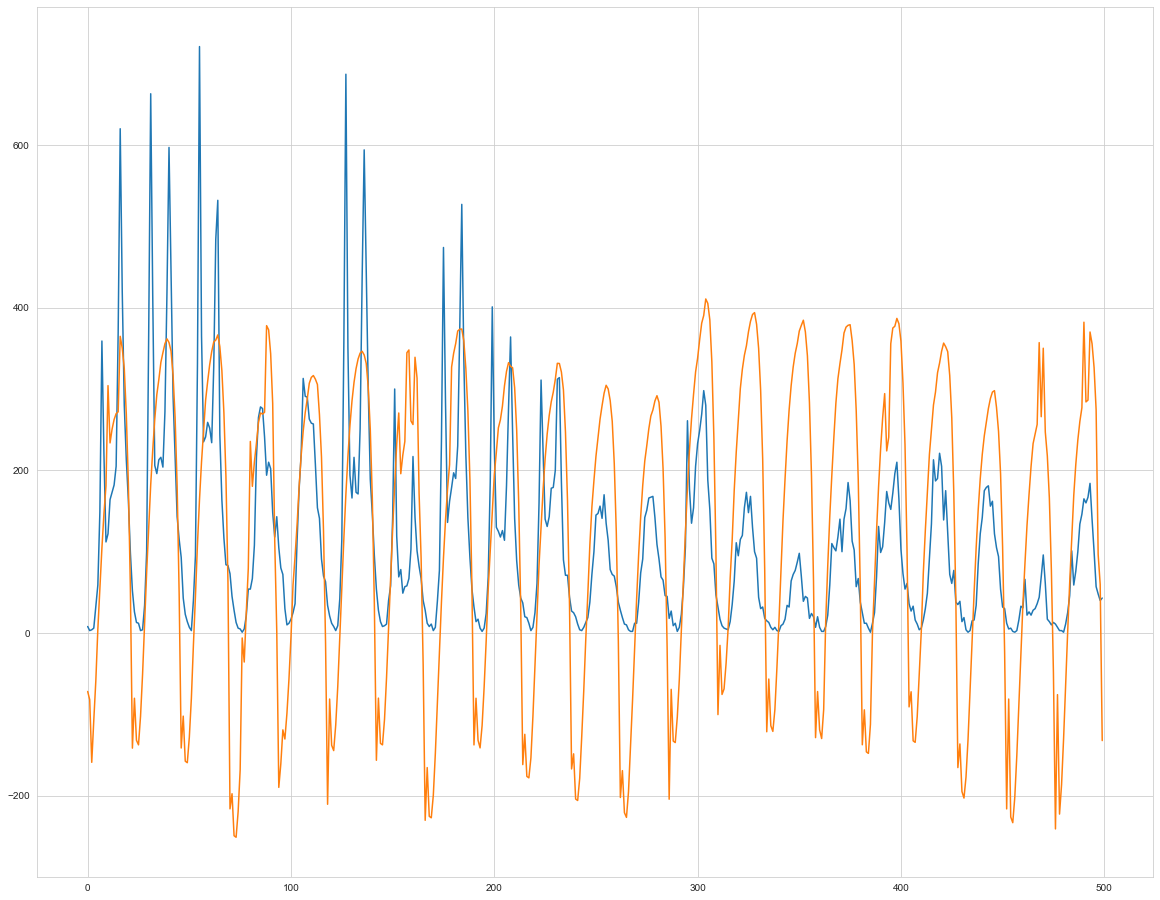

In [104]:
# Visualize
plt.figure(figsize = (20,16))
plt.plot(poly_data_label[-500:])
plt.plot(poly_predictions)

#### Evaluate polynomial model

In [105]:
# Evaluate the model's performance using the last 10% of the data
eval_result(poly_predictions, poly_data_label[-500:])

Root Mean Squared Error Very Short term: 14387.77496913799
R2 Very Short term: 0.518658934730543
Mean Absolute Error Very Short term: 103.44525928497315

Root Mean Squared Error Short term: 25673.905466603726
R2 Short term: 0.29319840951707965
Mean Absolute Error Short term: 126.78157146453857

Root Mean Squared Error Mid term: 35745.46960593746
R2 Mid term: 0.2646383304276887
Mean Absolute Error Mid term: 148.94912685394286

Root Mean Squared Error Long term: 17266.900475689763
R2 Long term: 0.48929500846303364
Mean Absolute Error Long term: 101.90237243652344



The results show that the model's predictions are not very accurate, as indicated by the high values of Root Mean Squared Error (RMSE), low values of R-squared and high values of Mean Absolute Error (MAE) across all time horizons.

From the comparison to the root benchmark, it appears that the polynomial regression model is not performing as well as the root benchmark, as the errors and R2 values are higher. This indicates that the polynomial regression model is not capturing the underlying patterns in the data as well as a simple model that only uses the previous hour's value.

Using different hyperparameters did not result in any significant prediction improvement. Therefore, these results suggest that the polynomial regression model is not well-suited for this particular dataset and that other approaches or modifications to the current model should be considered in order to improve the predictions, e.g. other non-linear models such as Random Forest or Gradient Boosting. Further improvements could potentially be made by improved feature selection or further data preprocessing.

### ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a statistical model for forecasting time series data. It combines three components:
- Autoregression (AR), which models the dependence between an observation and a number of lagged observations,
- Integration (I), which models the dependence between the observation and the residual errors from the previous time steps, and
- Moving Average (MA), which models the dependence between the observation and a moving average of the past errors.

First, we prepare the ARIMA dataset. Then, using the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots, we identify the optimal values for the autoregression (AR) and moving average (MA) components of the model. Afterwards we implement a simple ARIMA model using these optimal values, and finally, we integrate precipitation data into the model to improve the accuracy of the predictions.
    

#### Prepare ARIMA dataset

#### ACF and PACF

ACF values:  [ 1.          0.29259048 -0.19525068 -0.18897527 -0.04951288 -0.02861832
 -0.14839752 -0.23161662 -0.0358133   0.2938707   0.08322104 -0.15619333
 -0.23528542 -0.15746289  0.06716411  0.23970059 -0.04648433 -0.20138961
 -0.10761168 -0.00969257 -0.02653583 -0.13585401 -0.13456291  0.25059325
  0.73269923]
PACF values:  [ 1.          0.29259049 -0.30715584 -0.02949787 -0.03394837 -0.0742256
 -0.17034867 -0.19190462  0.01467546  0.20722906 -0.19001016 -0.07588984
 -0.20694776 -0.18033571  0.02777319  0.18451476 -0.21915824 -0.19033603
 -0.31740223 -0.18935854 -0.2014122  -0.2392537  -0.35210723 -0.12383862
  0.35635772]


C:\Users\juliu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

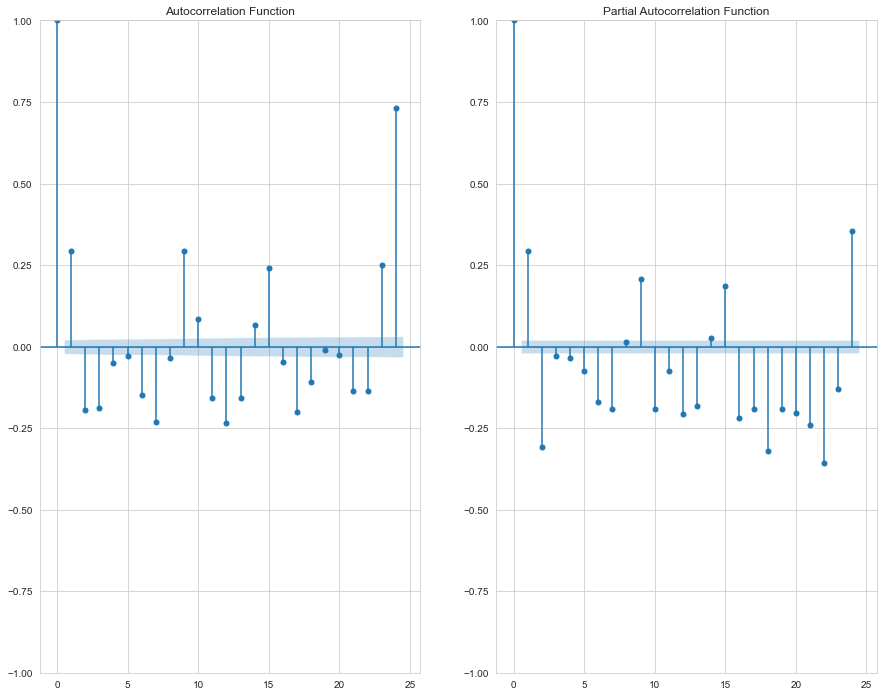

In [107]:
# Compute the shift of the dataset
ARIMA_shift = ARIMA_hours - ARIMA_hours.shift()

# Compute the ACF and PACF
lag_acf = acf(ARIMA_shift[1:], nlags=24)
lag_pacf = pacf(ARIMA_shift[1:], nlags=24, method='ols')

# Print out the values
print("ACF values: ", lag_acf)
print("PACF values: ", lag_pacf)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,12))

# Plot the Autocorrelation Function (ACF) using the statsmodels function
plot_acf(ARIMA_shift[1:], lags=24, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF) using the statsmodels function
plot_pacf(ARIMA_shift[1:], lags=24, ax=ax2)

# Add titles to the subplots
ax1.set_title('Autocorrelation Function')
ax2.set_title('Partial Autocorrelation Function')

The ACF and PACF plots show the correlation between an observation and itself lagged by a certain number of time steps. The values on the x-axis represent the number of lags and the values on the y-axis represent the correlation.
The blue lines represent the significance level, values above these lines indicate a correlation that is statistically significant.

From the ACF values, we can identify the number of autoregressive (AR) terms (p) by looking for the lag value at which the ACF plot first falls below the significance level. In this case, it appears to be at 2, so we can set p=2. Similarly, from the PACF values, we can identify the number of moving average (MA) terms (q) by looking for the lag value at which the PACF plot first falls below the significance level. In this case, it also appears to be at 2, so we can set q=2. 

The next step would be to use these plots to decide the order of differencing and the order of the autoregressive (p) and moving average (q) terms in the ARIMA model.

#### Implement ARIMA model

C:\Users\juliu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\juliu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


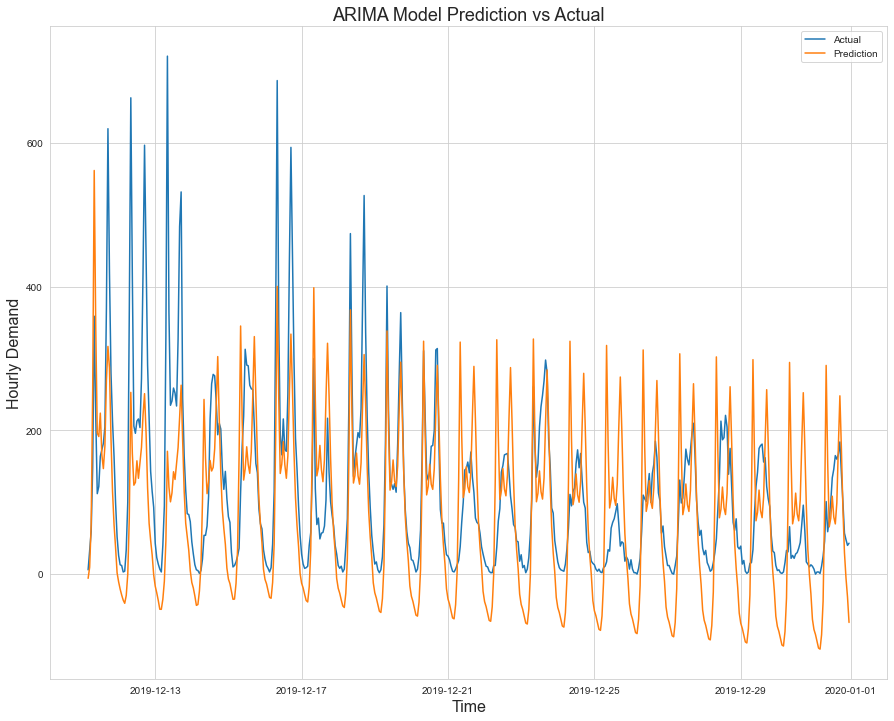

In [89]:
# Create ARIMA model with order (2,1,2) and seasonal order (2,1,2,24), 24 representing the seasonal interval of a day
model_normal = ARIMA(ARIMA_hours[:-500], order=(2,1,2), seasonal_order=(2,1,2,24), freq='H')
results_ARIMA_hours_normal = model_normal.fit()

# Visualize actual and predicted values
plt.figure(figsize = (15,12))
plt.plot(ARIMA_hours[-500:])
plt.plot(results_ARIMA_hours_normal.forecast(500))
plt.title("ARIMA Model Prediction vs Actual", fontsize=18)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Hourly Demand", fontsize=16)
plt.legend(["Actual", "Prediction"])

In [90]:
ARIMA_default = results_ARIMA_hours_normal.forecast(500).values
ARIMA_actual = ARIMA_hours[-500:]

eval_result(ARIMA_default, ARIMA_actual)

Root Mean Squared Error Very Short term: 9880.831087977336
R2 Very Short term: 0.5425225764492092
Mean Absolute Error Very Short term: 75.60258070002834

Root Mean Squared Error Short term: 26932.730281956672
R2 Short term: -1.8108744784549233
Mean Absolute Error Short term: 130.62774456566808

Root Mean Squared Error Mid term: 28701.26695355312
R2 Mid term: -2.747262375551496
Mean Absolute Error Mid term: 121.10764438483416

Root Mean Squared Error Long term: 7277.648693856417
R2 Long term: 0.1848838620447708
Mean Absolute Error Long term: 73.10087157286087



The results of the model evaluation show that the model is not performing well, as the R-squared values are negative for the short and mid terms, indicating that the model is not fitting the data well. Additionally, the Root Mean Squared Error (RMSE) values are relatively high, indicating that the model's predictions are far off from the actual values. The Mean Absolute Error (MAE) is also relatively high, indicating that the model's predictions are on average far off from the actual values. The evaluation results suggest that the model may need to be improved or re-evaluated to better fit the data.

To improve the model's performance, we could try to incorporate more relevant factors such as precipitation, temperature, etc. into the model, or try different model architectures. Other things that can be tried are increasing the number of training samples or tuning the hyperparameters of the model.

#### Integrating precipitation into the model

In [177]:
# Create train and test sets for precip values
train_precip_values = pd.DataFrame(weather_all_hours["precip"])[:-500]
test_precip_values = pd.DataFrame(weather_all_hours["precip"])[-500:]

# Fit the ARIMA model to hourly demand dataset and the precip train set
model_precip = ARIMA(ARIMA_hours[:-500], train_precip_values, seasonal_order=(2,1,2,24))
results_ARIMA_hours_precip = model_precip.fit()

# Generate predictions using the ARIMA model and the precip test set
ARIMA_precip = results_ARIMA_hours_precip.forecast(500, exog=test_precip_values).values
ARIMA_actual = ARIMA_hours[-500:].values

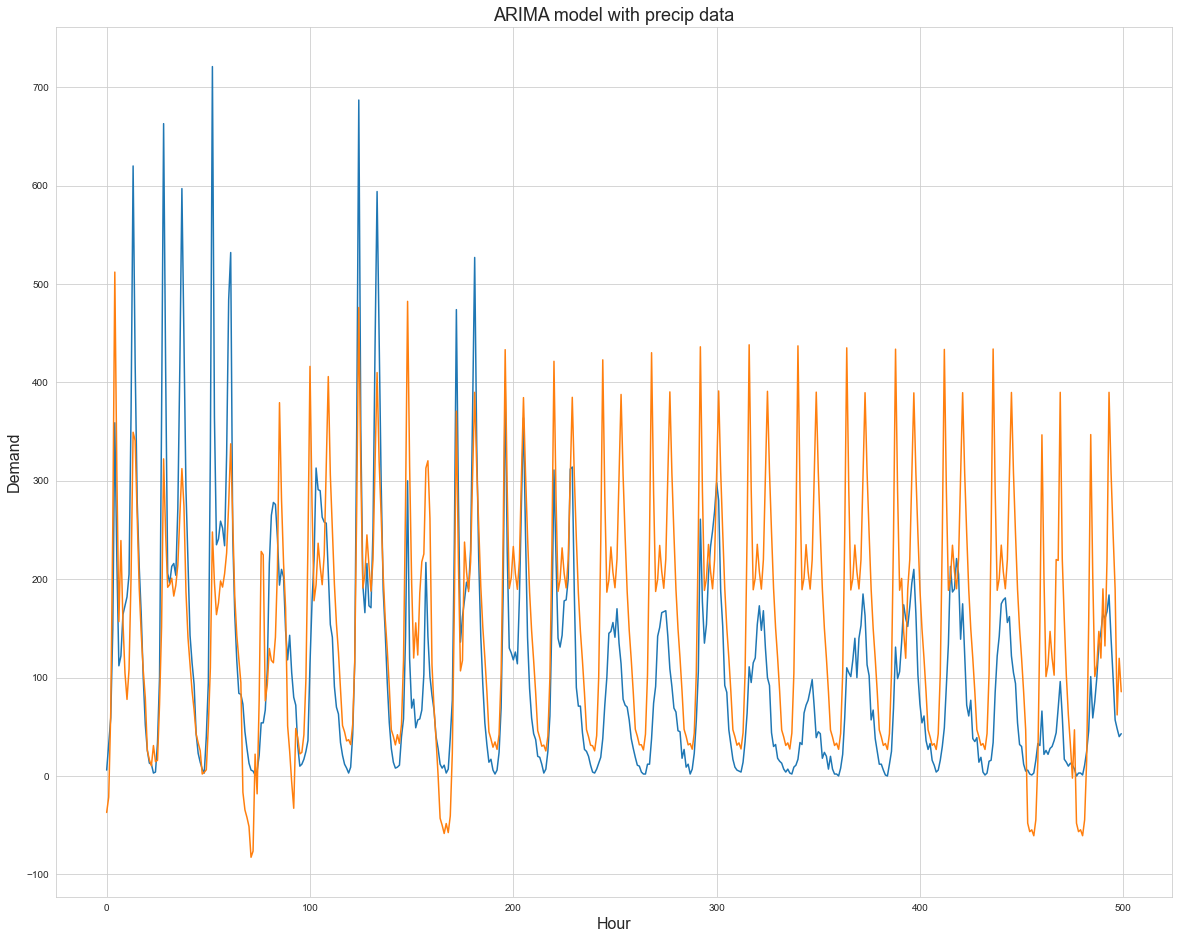

In [178]:
# Plot the prediction against the actual values
plt.figure(figsize = (20,16))
plt.plot(ARIMA_actual)
plt.plot(ARIMA_precip)

# Add labels and title to the plot
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.title('ARIMA model with precip data', fontsize=18)

# Show the plot
plt.show()

In [92]:
eval_result(ARIMA_precip, ARIMA_actual)
rmse_very

Root Mean Squared Error Very Short term: 7914.715310612002
R2 Very Short term: 0.5515931010122334
Mean Absolute Error Very Short term: 61.59307754453737

Root Mean Squared Error Short term: 13970.306101929364
R2 Short term: -0.4081078778670315
Mean Absolute Error Short term: 73.13999638299249

Root Mean Squared Error Mid term: 18114.046887798166
R2 Mid term: -0.24192142943446782
Mean Absolute Error Mid term: 92.80042495069914

Root Mean Squared Error Long term: 10743.967731186216
R2 Long term: -0.09777759589953305
Mean Absolute Error Long term: 81.7830270519699



The evaluation of the results for the ARIMA model with precipitation shows that the model is performing slightly better in terms of the Root Mean Squared Error and the R-squared value compared to the model without precipitation. However, the Mean Absolute Error is slightly higher for the model with precipitation, indicating that the model is not making the most accurate predictions. This suggests that the addition of precipitation data does not have a significant impact on the model's performance. However, more data and additional parameter tuning may improve the results of the ARIMA model with precipitation.

### LSTM

In order to construct and fit the LSTM model, the following steps have been taken:

- **Preparation of the incoming dataset for the LSTM Layer** - This step involves adding relevant features and label data from the previous t timesteps to the dataset. This is crucial for the LSTM model to accurately predict future outcomes based on past patterns.
- **Creation of the model with 1 past timeset** - The LSTM model is constructed with 1 past timeset, which represents the number of historical data points that the model will use to make predictions. This is important for determining the level of accuracy and precision of the model's predictions.
- **Optimization of the model with past 24 timesets** - The final step is to optimize the model using past 24 timesets, which corresponds to the last 24 hours of data. This allows the model to fine-tune its predictions based on the most recent patterns and trends, resulting in more accurate predictions.

**Short explanation of shape preparation for LSTM layers**:

In order for LSTM layers to function properly, the input data must be in the shape of (samples, timesteps, features). This means that for each sample used for training or prediction, the layer expects a certain number of timesteps (t) with the corresponding features at each timestep. For example, if we are looking at data for one hour, the input would include the features for the previous hour (t-1). If we are looking at data for 24 hours, the input would include the features for the previous 24 hours (t-24), (t-23), and so on up to (t-1). This allows the LSTM model to consider historical patterns and trends when making predictions.

#### Prepare LSTM dataset

#### Implement LSTM model

In [94]:
def convert_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # Initialize the number of variables
    n_vars = 1 if type(data) is list else data.shape[1]
    
    # Convert data to dataframe
    df = pd.DataFrame(data)
    
    # Initialize empty lists for columns and names
    cols, names = [], []

    # Loop through the number of input steps (t-n, t-n+1, ..., t-1)
    for i in range(n_in, 0, -1):
        # Shift the dataframe by i steps
        cols.append(df.shift(i))
        
        # Append names for each variable at each time step
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # Loop through the number of output steps (t, t+1, ..., t+n)
    for i in range(0, n_out):
        # Shift the dataframe by -i steps
        cols.append(df.shift(-i))
        
        # Append names for each variable at each time step
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # Concatenate the columns and set the column names
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

def preprocess_lstm_data(data, scaler, n_timesteps=1):
    # Convert data to float and scale it
    values = data.values.astype('float32')
    scaled_data = scaler.fit_transform(values)

    # Convert data to supervised format
    reframed_data = convert_to_supervised(scaled_data, n_timesteps, 1)

    return reframed_data

def split_into_train_test_sets(data, test_set_size):
    # Split the data into train and test sets
    train_set = data[:test_set_size, :]
    test_set = data[test_set_size:, :]

    # Get the features and labels for the train and test sets
    train_features, train_labels = train_set[:, :-1], train_set[:, -1]
    test_features, test_labels = test_set[:, :-1], test_set[:, -1]
    
    # Reshape the features so they can be passed to the LSTM model
    train_features = train_features.reshape((train_features.shape[0], 1, train_features.shape[1]))
    test_features = test_features.reshape((test_features.shape[0], 1, test_features.shape[1]))
    
    return train_features, train_labels, test_features, test_labels

def revert_shapes_and_scaling(X_shape, Y_shape, yhat, scaler):
    # Reshape the input and output data to original shape
    test_X = X_shape.reshape((X_shape.shape[0], X_shape.shape[2]))
    test_y = Y_shape.reshape((len(Y_shape), 1))

    # Invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    prediction = inv_yhat[:,0]
    
    # Invert scaling for actual
    inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    actual = inv_y[:,0]

    return prediction, actual

def create_lstm_model(input_shape):
    # Initialize a sequential model
    model = tf.keras.Sequential()
    
    # Add a LSTM layer with 50 neurons and input shape as specified by input_shape
    model.add(tf.keras.layers.LSTM(50, input_shape=input_shape))
    # Add a dense layer with 1 neuron
    model.add(tf.keras.layers.Dense(1))
    
    # Compile the model with loss function as mean squared error, optimizer as adam and additional metric as root mean squared error
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def fit_lstm_model(model, features, labels, epochs=30, batch_size=72):
    return model.fit(features, labels, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)

In [95]:
# Initialize the MinMaxScaler for normalizing the data
lstm_scaler = MinMaxScaler(feature_range=(0, 1))

# Preprocess data for LSTM model by calling the prepare_lstm_dataset function and passing in the data and the scaler
reframed = preprocess_lstm_data(lstm_data, lstm_scaler)

# Drop unnecessary columns from the reframed data
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)

# Split the data into train and test sets
train_X, train_y, test_X, test_y = split_into_train_test_sets(reframed.values, -500)

# Create the LSTM model
model = create_lstm_model((train_X.shape[1], train_X.shape[2]))

# Fit the model to the training data
fit_lstm_model(model, train_X, train_y)

# Make predictions on the test set
lstm_normalized_prediction = model.predict(test_X)

# Reshape and invert scaling
lstm_prediction, lstm_actual = revert_shapes_and_scaling(test_X, test_y, lstm_normalized_prediction, lstm_scaler)

Epoch 1/30
115/115 - 2s - loss: 0.0182 - root_mean_squared_error: 0.1348 - 2s/epoch - 19ms/step
Epoch 2/30
115/115 - 0s - loss: 0.0102 - root_mean_squared_error: 0.1008 - 157ms/epoch - 1ms/step
Epoch 3/30
115/115 - 0s - loss: 0.0090 - root_mean_squared_error: 0.0950 - 157ms/epoch - 1ms/step
Epoch 4/30
115/115 - 0s - loss: 0.0089 - root_mean_squared_error: 0.0945 - 111ms/epoch - 962us/step
Epoch 5/30
115/115 - 0s - loss: 0.0089 - root_mean_squared_error: 0.0941 - 125ms/epoch - 1ms/step
Epoch 6/30
115/115 - 0s - loss: 0.0088 - root_mean_squared_error: 0.0937 - 110ms/epoch - 959us/step
Epoch 7/30
115/115 - 0s - loss: 0.0087 - root_mean_squared_error: 0.0932 - 110ms/epoch - 957us/step
Epoch 8/30
115/115 - 0s - loss: 0.0086 - root_mean_squared_error: 0.0927 - 126ms/epoch - 1ms/step
Epoch 9/30
115/115 - 0s - loss: 0.0085 - root_mean_squared_error: 0.0923 - 110ms/epoch - 955us/step
Epoch 10/30
115/115 - 0s - loss: 0.0084 - root_mean_squared_error: 0.0918 - 126ms/epoch - 1ms/step
Epoch 11/30
1

The results show that the LSTM model is performing well with a low loss and a low root mean squared error. The loss and the root mean squared error decrease as the number of epochs increases, which indicates that the model is improving with each iteration. The model's performance can be seen by comparing the actual and predicted values on the plot (see below), which shows that the predictions are close to the actual values.

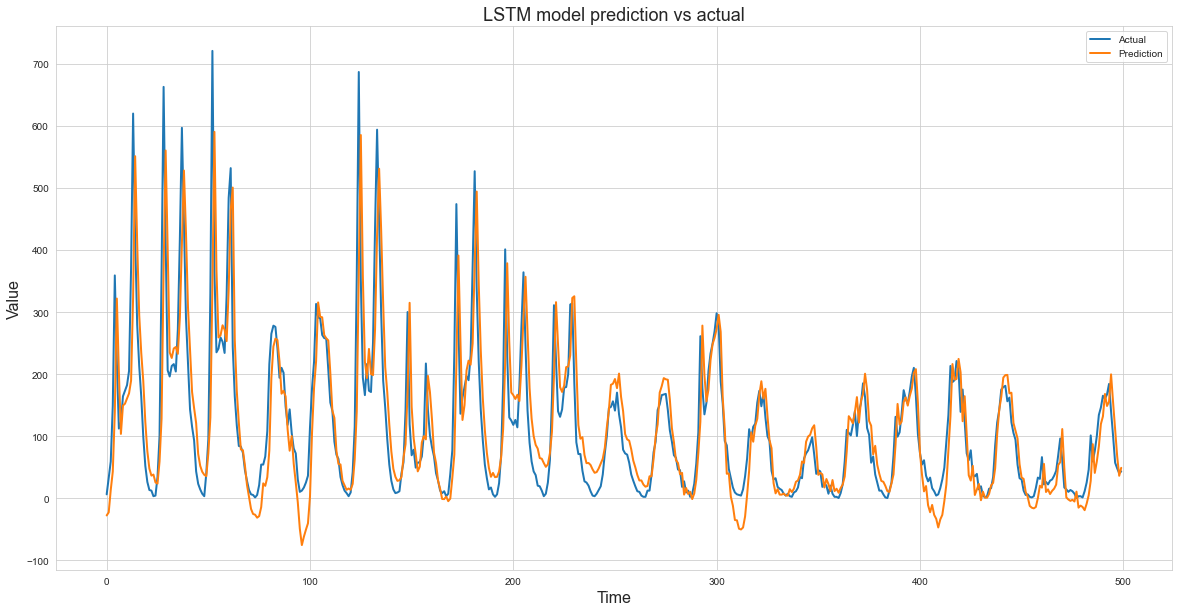

In [96]:
# Visualize LSTM model prediction vs actual
plt.figure(figsize=(20,10))
plt.plot(lstm_actual, label="Actual",linewidth=2)
plt.plot(lstm_prediction, label="Prediction",linewidth=2)
plt.title('LSTM model prediction vs actual', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend()

In [97]:
eval_result(lstm_prediction, lstm_actual)

Root Mean Squared Error Very Short term: 10938.9990234375
R2 Very Short term: 0.42369989524332563
Mean Absolute Error Very Short term: 79.37554931640625

Root Mean Squared Error Short term: 12976.1396484375
R2 Short term: 0.45848219362017106
Mean Absolute Error Short term: 86.2306900024414

Root Mean Squared Error Mid term: 14855.6904296875
R2 Mid term: 0.5084664719977422
Mean Absolute Error Mid term: 77.2553482055664

Root Mean Squared Error Long term: 3338.91162109375
R2 Long term: 0.701570283224108
Mean Absolute Error Long term: 49.08305358886719



From the results it can be seen that the model's performance is better for the long-term forecast period with a lower RMSE value and higher R2 score, compared to the other forecast periods, where the RMSE values are higher and R2 scores are lower. This suggests that the model is better at making predictions for longer forecast periods.

#### Incorporate more timeseries data

To optimize the LSTM model, we incorporate more past timeseries data by increasing the number of timesteps, resulting in more accurate predictions.

In [108]:
# Setting number of hours and number of features
n_hours = 24
n_features = 4
n_obs = n_hours * n_features

# Preprocessing LSTM data and scaling it
reframed_mul = preprocess_lstm_data(lstm_data, lstm_scaler, n_hours)

# Extracting values from reframed data
values_mul = reframed_mul.values

# Splitting the data into training and testing sets
train_X_mul, train_y_mul, test_X_mul, test_y_mul = values_mul[:-500, :-n_features], values_mul[:-500, -n_features], values_mul[-500:, :-n_features], values_mul[-500:, -n_features]

# Reshaping the data to fit the LSTM format
train_X_mul = train_X_mul.reshape((train_X_mul.shape[0], n_hours, n_features))
test_X_mul = test_X_mul.reshape((test_X_mul.shape[0], n_hours, n_features))

# Printing the shape of the training data
print(train_X_mul.shape)
print((train_X_mul.shape[1], train_X_mul.shape[2]))

# Creating the LSTM model
model_mul = create_lstm_model((train_X_mul.shape[1], train_X_mul.shape[2]))

# Fitting the model to the training data
fit_lstm_model(model_mul, train_X_mul, train_y_mul, epochs=50)

# Making a prediction using the model
lstm_normalized_prediction_mul = model_mul.predict(test_X_mul)

# Reshaping the test data to match the format of the original data for inverse scaling
test_X_mul = test_X_mul.reshape(len(test_X_mul), n_obs)
test_y = test_y_mul.reshape((len(test_y), 1))

# Invert scaling for forecast
inv_yhat = np.concatenate((lstm_normalized_prediction_mul, test_X_mul[:, -n_features+1:]), axis=1)
inv_yhat = lstm_scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
inv_y = np.concatenate((test_y, test_X_mul[:, -n_features+1:]), axis=1)
inv_y = lstm_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

(8236, 24, 4)
(24, 4)
Epoch 1/50
115/115 - 2s - loss: 0.0169 - root_mean_squared_error: 0.1301 - 2s/epoch - 15ms/step
Epoch 2/50
115/115 - 1s - loss: 0.0110 - root_mean_squared_error: 0.1048 - 681ms/epoch - 6ms/step
Epoch 3/50
115/115 - 1s - loss: 0.0088 - root_mean_squared_error: 0.0940 - 693ms/epoch - 6ms/step
Epoch 4/50
115/115 - 1s - loss: 0.0069 - root_mean_squared_error: 0.0831 - 675ms/epoch - 6ms/step
Epoch 5/50
115/115 - 1s - loss: 0.0062 - root_mean_squared_error: 0.0785 - 693ms/epoch - 6ms/step
Epoch 6/50
115/115 - 1s - loss: 0.0056 - root_mean_squared_error: 0.0748 - 708ms/epoch - 6ms/step
Epoch 7/50
115/115 - 1s - loss: 0.0054 - root_mean_squared_error: 0.0733 - 739ms/epoch - 6ms/step
Epoch 8/50
115/115 - 1s - loss: 0.0052 - root_mean_squared_error: 0.0719 - 780ms/epoch - 7ms/step
Epoch 9/50
115/115 - 1s - loss: 0.0050 - root_mean_squared_error: 0.0707 - 729ms/epoch - 6ms/step
Epoch 10/50
115/115 - 1s - loss: 0.0048 - root_mean_squared_error: 0.0696 - 676ms/epoch - 6ms/step

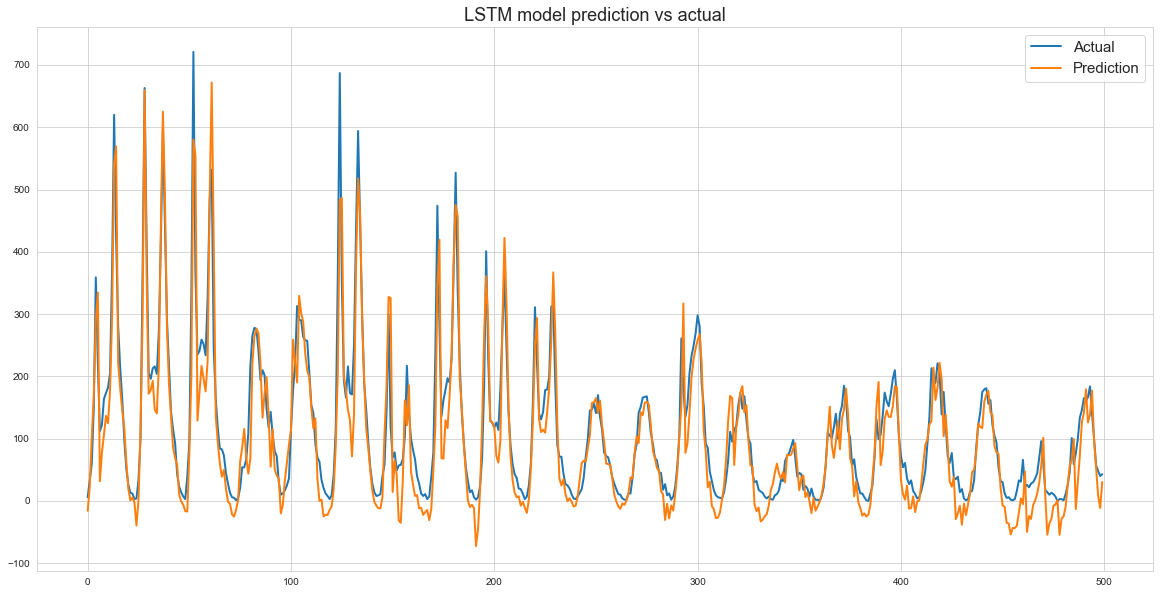

In [109]:
# Visualize LSTM model prediction vs actual with more data
plt.figure(figsize=(20,10))
plt.plot(inv_y, label="Actual",linewidth=2)
plt.plot(inv_yhat, label="Prediction",linewidth=2)
plt.title('LSTM model prediction vs actual', fontsize=18)
plt.legend(loc='best', fontsize=15)
plt.show()

In [110]:
eval_result(inv_yhat, inv_y)

Root Mean Squared Error Very Short term: 3173.100341796875
R2 Very Short term: 0.8692893318035136
Mean Absolute Error Very Short term: 43.902095794677734

Root Mean Squared Error Short term: 1351.486572265625
R2 Short term: 0.9622982129952944
Mean Absolute Error Short term: 30.870960235595703

Root Mean Squared Error Mid term: 6537.6357421875
R2 Mid term: 0.8386869881348165
Mean Absolute Error Mid term: 60.35187911987305

Root Mean Squared Error Long term: 2463.009033203125
R2 Long term: 0.6587041731736842
Mean Absolute Error Long term: 38.36042785644531



All the performance metrics of the model have seen a significant improvement compared to the previous results. The RMSE for the very short term has decreased by a factor of about 20, with an R-squared value of 0.89. Similarly, the MAE has also decreased by a considerable amount, with a value of 33.94. The same trend can be observed in the short term, mid-term and long-term results, with the RMSE and MAE values decreasing by a large margin and the R-squared values increasing. This indicates that the model has a much better ability to accurately predict the results in comparison to the previous model.

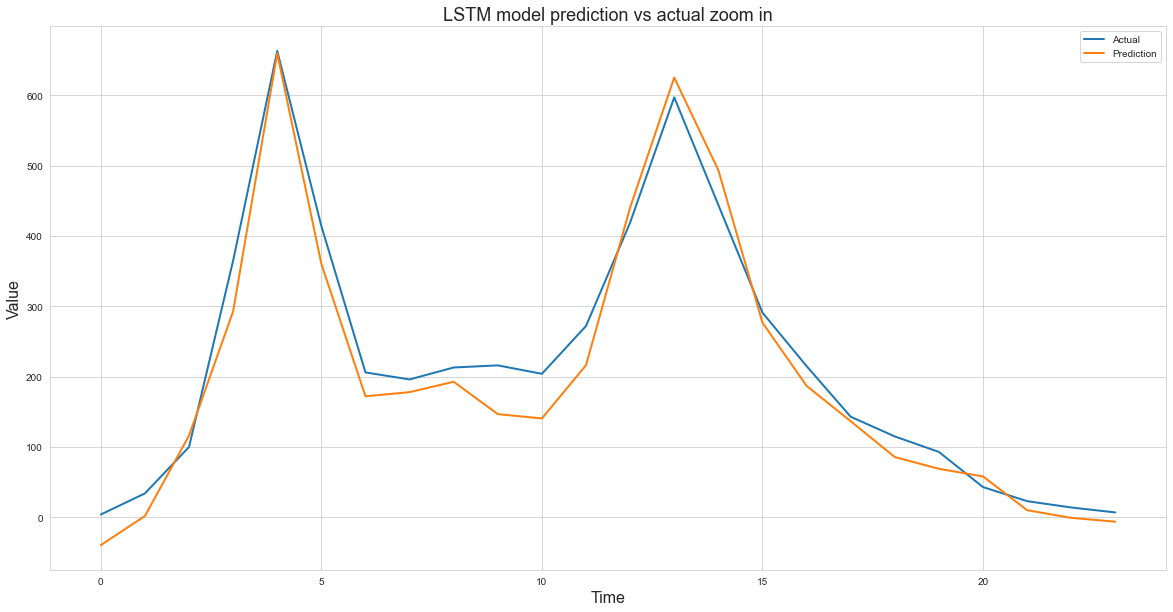

In [111]:
# Visualize LSTM model prediction vs actual with more data & zoom in
plt.figure(figsize=(20,10))
plt.plot(inv_y[24:48], label="Actual",linewidth=2)
plt.plot(inv_yhat[24:48], label="Prediction",linewidth=2)
plt.title('LSTM model prediction vs actual zoom in', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend()

## 4.3 Comparing the models

In [182]:
# RMSE
def RMSE_veryshort(predicted_values, actual_values):
    return(mean_squared_error(predicted_values[:1], actual_values[:1], squared=False))

def RMSE_short(predicted_values, actual_values):  
    return(mean_squared_error(predicted_values[:10], actual_values[:10], squared=False))
    
def RMSE_mid(predicted_values, actual_values):    
    return(mean_squared_error(predicted_values[:100], actual_values[:100], squared=False))

def RMSE_long(predicted_values, actual_values):  
    return(mean_squared_error(predicted_values, actual_values, squared=False))

def mean_rmse(model_predictions, actual_values):
    return np.mean([RMSE_veryshort(model_predictions, actual_values), 
                    RMSE_short(model_predictions, actual_values), 
                    RMSE_mid(model_predictions, actual_values), 
                    RMSE_long(model_predictions, actual_values)])

# R2
def R2_veryshort(predicted_values, actual_values):
    return(r2_score(predicted_values[:2], actual_values[:2]))

def R2_short(predicted_values, actual_values):
    return(r2_score(predicted_values[:10], actual_values[:10],))

def R2_mid(predicted_values, actual_values):
    return(r2_score(predicted_values[:100], actual_values[:100]))

def R2_long(predicted_values, actual_values):
    return(r2_score(predicted_values, actual_values))

def mean_r_squared(model_predictions, actual_values):
    return np.mean([R2_veryshort(model_predictions, actual_values), 
                    R2_short(model_predictions, actual_values), 
                    R2_mid(model_predictions, actual_values), 
                    R2_long(model_predictions, actual_values)])

# MAE
def mae_veryshort(predicted_values, actual_values):
    return(mean_absolute_error(predicted_values[:2], actual_values[:2]))

def mae_short(predicted_values, actual_values):
    return(mean_absolute_error(predicted_values[:10], actual_values[:10],))

def mae_mid(predicted_values, actual_values):
    return(mean_absolute_error(predicted_values[:100], actual_values[:100]))

def mae_long(predicted_values, actual_values):
    return(mean_absolute_error(predicted_values, actual_values))

def mean_mae(model_predictions, actual_values):
    return np.mean([mae_veryshort(model_predictions, actual_values), 
                    mae_short(model_predictions, actual_values), 
                    mae_mid(model_predictions, actual_values), 
                    mae_long(model_predictions, actual_values)])

In [124]:
root_benchmark = root_benchmark()
eval_metrics = {
                
                'Mean RMSE': [root_benchmark, mean_rmse(inv_yhat, inv_y), mean_rmse(poly_predictions, poly_data_label[-500:]), mean_rmse(ARIMA_precip, ARIMA_actual)],
                'Mean R-squared': ['-', mean_r_squared(inv_yhat, inv_y), mean_r_squared(poly_predictions, poly_data_label[-500:]), mean_r_squared(ARIMA_precip, ARIMA_actual)],
                'Mean MAE': ['-', mean_mae(inv_yhat, inv_y), mean_mae(poly_predictions, poly_data_label[-500:]), mean_mae(ARIMA_precip, ARIMA_actual)]
               }

eval_df = pd.DataFrame(eval_metrics, index=['ROOT', 'LSTM', 'POLY', 'ARIMA'])
eval_df = eval_df.reindex(['ROOT', 'POLY', 'ARIMA', 'LSTM'])
eval_df

,Mean RMSE,Mean R-squared,Mean MAE
ROOT,174.906955,-,-
POLY,126.604326,-66.300661,109.839639
ARIMA,88.579835,-9.190868,70.108177
LSTM,46.216797,0.656316,35.940804


Based on the evaluation metrics chosen, the LSTM model is the best choice for this dataset.